In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']='white'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from datetime import date

In [2]:
from datetime import datetime

date_string = "21-08-2013"
format_string = "%d-%m-%Y"

try:
    parsed_date = datetime.strptime(date_string, format_string)
    print(parsed_date)
except ValueError as e:
    print(f"Error: {e}")

2013-08-21 00:00:00


In [3]:
df = pd.read_csv("D:/DATA SCIENCE BOOTCAMP/Mini Project Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/marketing_campaign_data.csv")
df.head()

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0   
1           1  2174        1954        S1         Lajang  46344000.0        1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1   
4           4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  AcceptedCmp3  \
0         0  04-09-2012       58  ...                  7             0   
1         1  08-03-2014       38  ...                  5             0   
2         0  21-08-2013       26  ...                  4             0   
3         0  10-02-2014       26  ...                  6             0   
4         0  19-01-2014       94  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 30 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [151]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.describe ()

Unnamed: 0            ID   Year_Birth        Income      Kidhome  \
count  2240.000000   2240.000000  2240.000000  2.216000e+03  2240.000000   
mean   1119.500000   5592.159821  1968.805804  5.224725e+07     0.444196   
std     646.776623   3246.662198    11.984069  2.517308e+07     0.538398   
min       0.000000      0.000000  1893.000000  1.730000e+06     0.000000   
25%     559.750000   2828.250000  1959.000000  3.530300e+07     0.000000   
50%    1119.500000   5458.500000  1970.000000  5.138150e+07     0.000000   
75%    1679.250000   8427.750000  1977.000000  6.852200e+07     1.000000   
max    2239.000000  11191.000000  1996.000000  6.666660e+08     2.000000   

          Teenhome      Recency       MntCoke      MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2.240000e+03    2240.000000     2.240000e+03   
mean      0.506250    49.109375  3.039357e+05   26302.232143     1.669500e+05   
std       0.544538    28.962453  3.365974e+05   39773.433765     2.257154e+05   
min       0.000000     0.000000  0.000000e+00       0.000000     0.000000e+00   
25%       0.000000    24.000000  2.375000e+04    1000.000000     1.600000e+04   
50%       0.000000    49.000000  1.735000e+05    8000.000000     6.700000e+04   
75%       1.000000    74.000000  5.042500e+05   33000.000000     2.320000e+05   
max       2.000000    99.000000  1.493000e+06  199000.000000     1.725000e+06   

       ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count  ...        2240.000000   2240.000000   2240.000000   2240.000000   
mean   ...           5.316518      0.072768      0.074554      0.072768   
std    ...           2.426645      0.259813      0.262728      0.259813   
min    ...           0.000000      0.000000      0.000000      0.000000   
25%    ...           3.000000      0.000000      0.000000      0.000000   
50%    ...           6.000000      0.000000      0.000000      0.000000   
75%    ...           7.000000      0.000000      0.000000      0.000000   
max    ...          20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 27 columns]

## *Feature Extraction*

In [7]:
df2 = df.copy()

In [8]:
print(df2.columns)

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


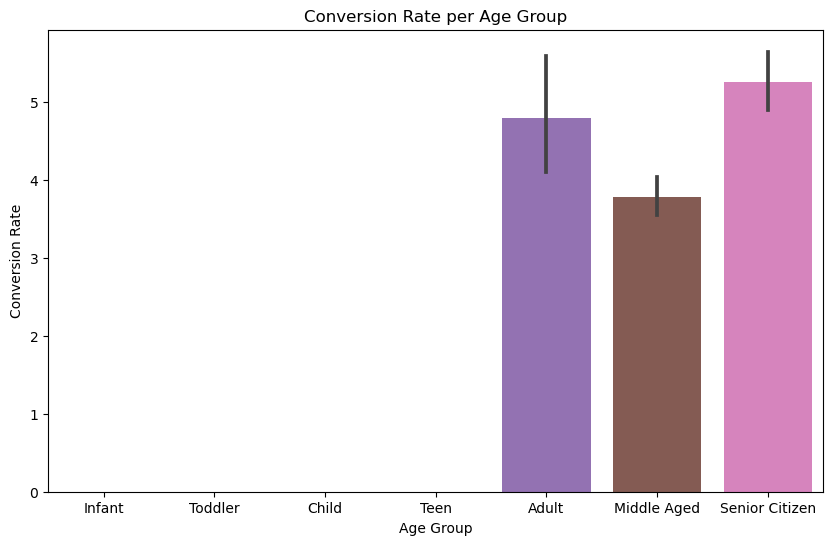

In [9]:
# 1. Buat kolom 'Age' berdasarkan data 'Year_Birth'
df2['Age'] = date.today().year - df2['Year_Birth']

# 2. Feature Engineering: Conversion Rate
def safe_div(x, y):
    if y == 0:
        return 0
    return x / y

df2['Total_Purchases'] = df2['NumDealsPurchases'] + df2['NumWebPurchases'] + df2['NumCatalogPurchases'] + df2['NumStorePurchases']
df2['Conversion_Rate'] = df2.apply(lambda x: safe_div(x['Total_Purchases'], x['NumWebVisitsMonth']), axis=1)

# 3. Mengelompokkan umur ke beberapa kelompok
def age_grouping(age):
    if age >= 0 and age <= 1:
        return 'Infant'
    elif age >= 2 and age <= 4:
        return 'Toddler'
    elif age >= 5 and age <= 12:
        return 'Child'
    elif age >= 13 and age <= 19:
        return 'Teen'
    elif age >= 20 and age <= 39:
        return 'Adult'
    elif age >= 40 and age <= 59:
        return 'Middle Aged'
    else:
        return 'Senior Citizen'

df2['Age_Group'] = df2['Age'].apply(age_grouping)

# 4. Plot hubungan antara Conversion Rate dan Jenis User (Age Group)
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Conversion_Rate', data=df2, order=['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Middle Aged', 'Senior Citizen'])
plt.title('Conversion Rate per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate')
plt.show()

In [9]:
df.duplicated().sum()

0

In [17]:
#change Dt_Customer dtype from object to datetime 64[ns]
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [19]:
# Import the required library
from datetime import date
import pandas as pd

# ... (Assuming you have already imported the pandas library and loaded the dataframe as df2)

# Create total accepted campaign feature
df2['Total_Acc_Cmp'] = df2['AcceptedCmp1'] + df2['AcceptedCmp2'] + df2['AcceptedCmp3'] + df2['AcceptedCmp4'] + df2['AcceptedCmp5']

# Create total purchases feature
df2['Total_Purchases'] = df2['NumDealsPurchases'] + df2['NumWebPurchases'] + df2['NumCatalogPurchases'] + df2['NumStorePurchases']

# Create conversion rate feature
def safe_div(x, y):
    if y == 0:
        return 0
    return x / y

df2['cvr'] = df2.apply(lambda x: safe_div(x['Total_Purchases'], x['NumWebVisitsMonth']), axis=1)

# Create age feature
df2['Age'] = 2022 - df2['Year_Birth']

# Create age group
age_list = []
for i in df2['Age']:
    if 0 <= i <= 1:
        group = 'Infant'
    elif 2 <= i <= 4:
        group = 'Toddler'
    elif 5 <= i <= 12:
        group = 'Child'
    elif 13 <= i <= 19:
        group = 'Teen'
    elif 20 <= i <= 39:
        group = 'Adult'
    elif 40 <= i <= 59:
        group = 'Middle Aged'
    else:
        group = 'Senior Citizen'
    age_list.append(group)

df2['Age_Group'] = age_list

# Create total spend feature
df2['Total_Spent'] = df2['MntCoke'] + df2['MntFishProducts'] + df2['MntFruits'] + df2['MntMeatProducts'] + df2['MntSweetProducts'] + df2['MntGoldProds']

# Create amount of children feature
df2['NumChildren'] = df2['Kidhome'] + df2['Teenhome']

# Create total days joined
df2['Dt_Collected'] = date.today()
df2['Dt_Collected'] = df2['Dt_Collected'].astype('datetime64[ns]')
df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'])  # Convert 'Dt_Customer' column to datetime

df2['Dt_Days_Customer'] = df2['Dt_Collected'] - df2['Dt_Customer']
df2['Dt_Days_Customer'] = df2['Dt_Days_Customer'].dt.days

## EDA

In [20]:
print(df2.columns)

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Purchases', 'Conversion_Rate', 'Age_Group',
       'Total_Acc_Cmp', 'cvr', 'Total_Spent', 'NumChildren', 'Dt_Collected',
       'Dt_Days_Customer'],
      dtype='object')


In [21]:
df2.drop(['Unnamed: 0', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Collected'], inplace=True, axis=1)

In [22]:
df2.head()

Education Marital_Status      Income  Kidhome  Teenhome Dt_Customer  \
0        S1         Lajang  58138000.0        0         0  2012-04-09   
1        S1         Lajang  46344000.0        1         1  2014-08-03   
2        S1    Bertunangan  71613000.0        0         0  2013-08-21   
3        S1    Bertunangan  26646000.0        1         0  2014-10-02   
4        S3        Menikah  58293000.0        1         0  2014-01-19   

   Recency  MntCoke  MntFruits  MntMeatProducts  ...  Response  Age  \
0       58   635000      88000           546000  ...         1   65   
1       38    11000       1000             6000  ...         0   68   
2       26   426000      49000           127000  ...         0   57   
3       26    11000       4000            20000  ...         0   38   
4       94   173000      43000           118000  ...         0   41   

   Total_Purchases  Conversion_Rate       Age_Group  Total_Acc_Cmp       cvr  \
0               25         3.571429  Senior Citizen              0  3.571429   
1                6         1.200000  Senior Citizen              0  1.200000   
2               21         5.250000     Middle Aged              0  5.250000   
3                8         1.333333           Adult              0  1.333333   
4               19         3.800000     Middle Aged              0  3.800000   

   Total_Spent  NumChildren  Dt_Days_Customer  
0      1617000            0              4133  
1        27000            2              3287  
2       776000            0              3634  
3        53000            1              3227  
4       422000            1              3483  

[5 rows x 34 columns]

In [23]:
df3 = df2.copy()

In [25]:
df3[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'NumChildren', 'Total_Acc_Cmp']] = df3[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'NumChildren', 'Total_Acc_Cmp']].astype('object')


In [26]:
#looping to categorize cat include categorical columns and num include numeric columns
cat = []
num = []
dat = []
for col in df3.columns: 
    if df3[col].dtype == 'O':
        cat.append(col)
    elif df3[col].dtype == 'int64' or df3[col].dtype == 'float64':
        num.append(col)
    else:
        dat.append(col)

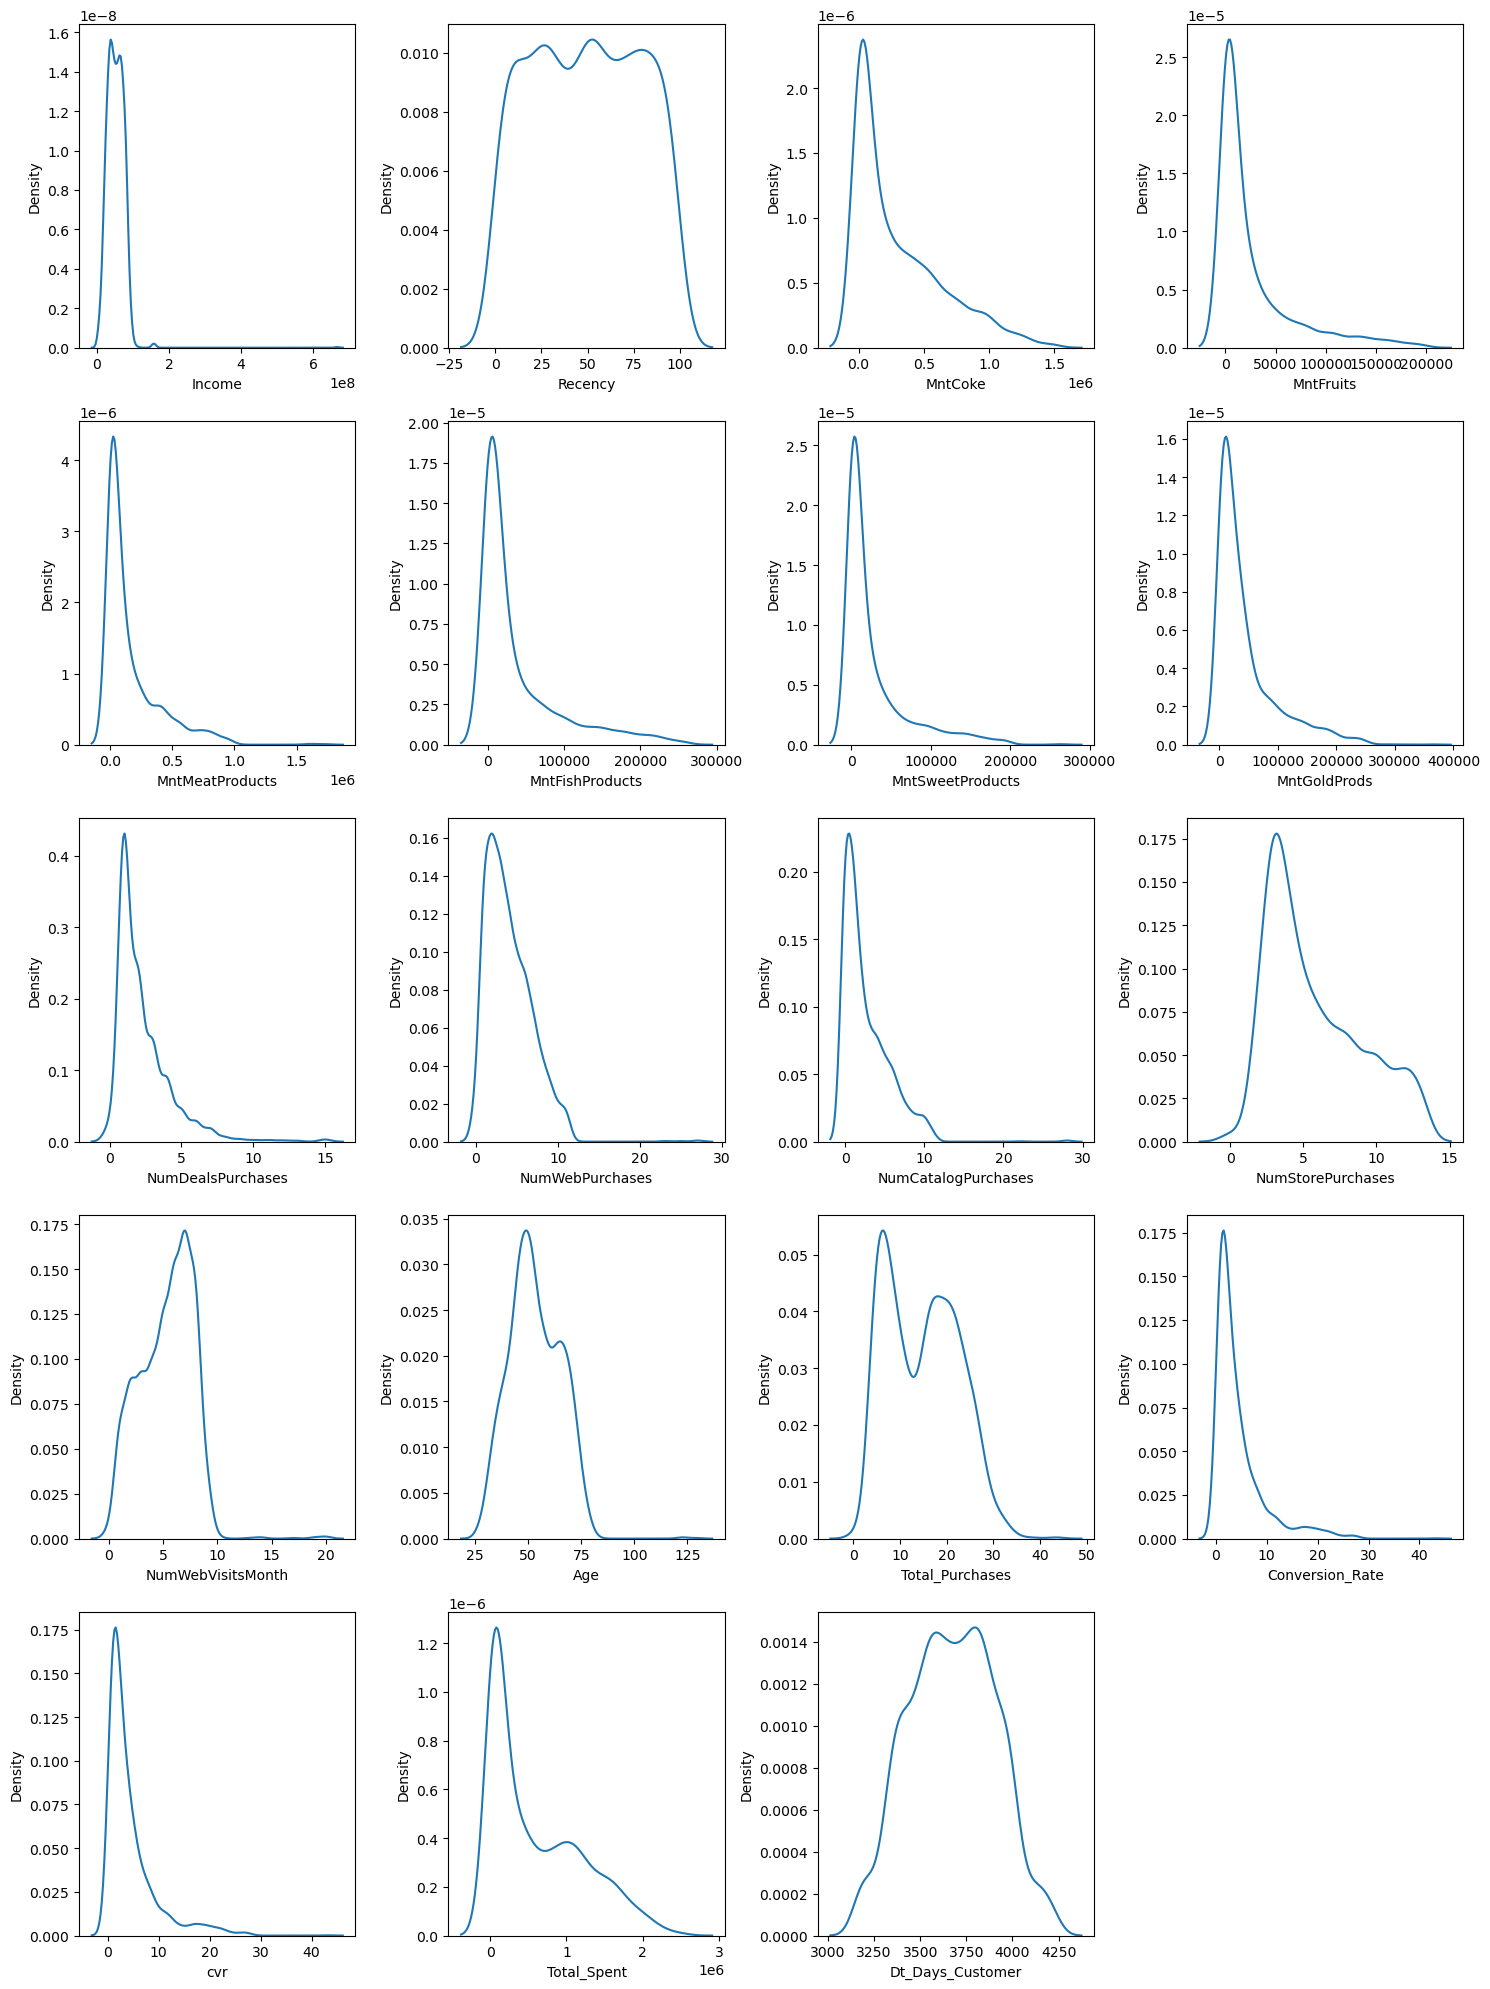

In [27]:
plt.figure(figsize= (15, 20))
for i in range(len(num)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x = df3[num[i]])
    plt.tight_layout()

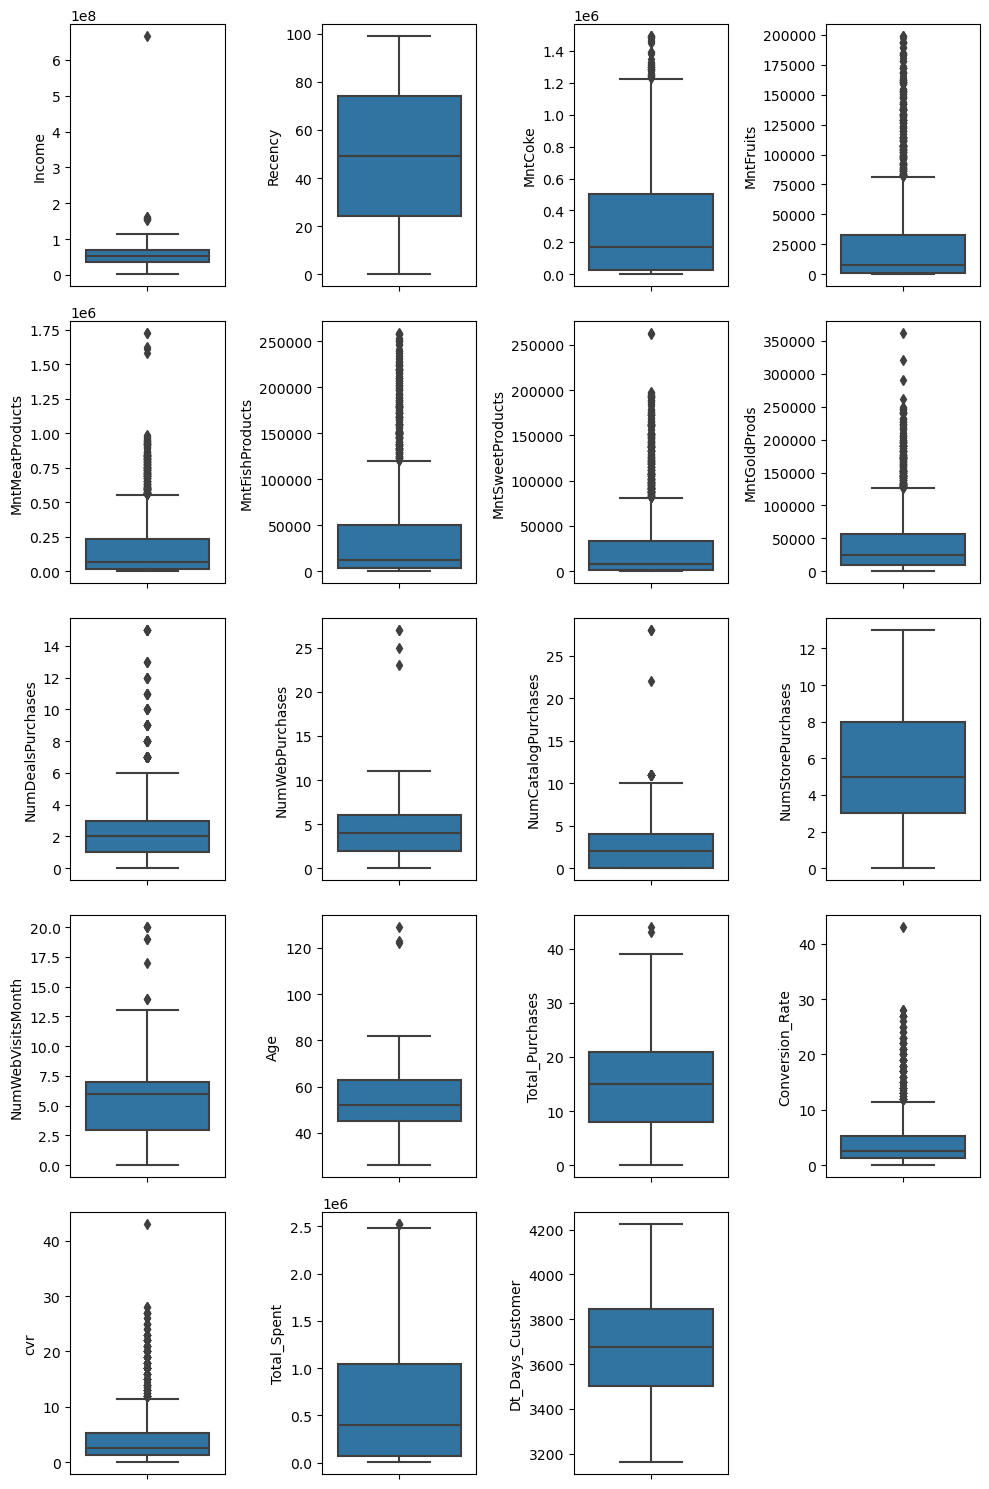

In [28]:
plt.figure(figsize= (10,15))
for i in range(len(num)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y = df3[num[i]], orient='v')
    plt.tight_layout()

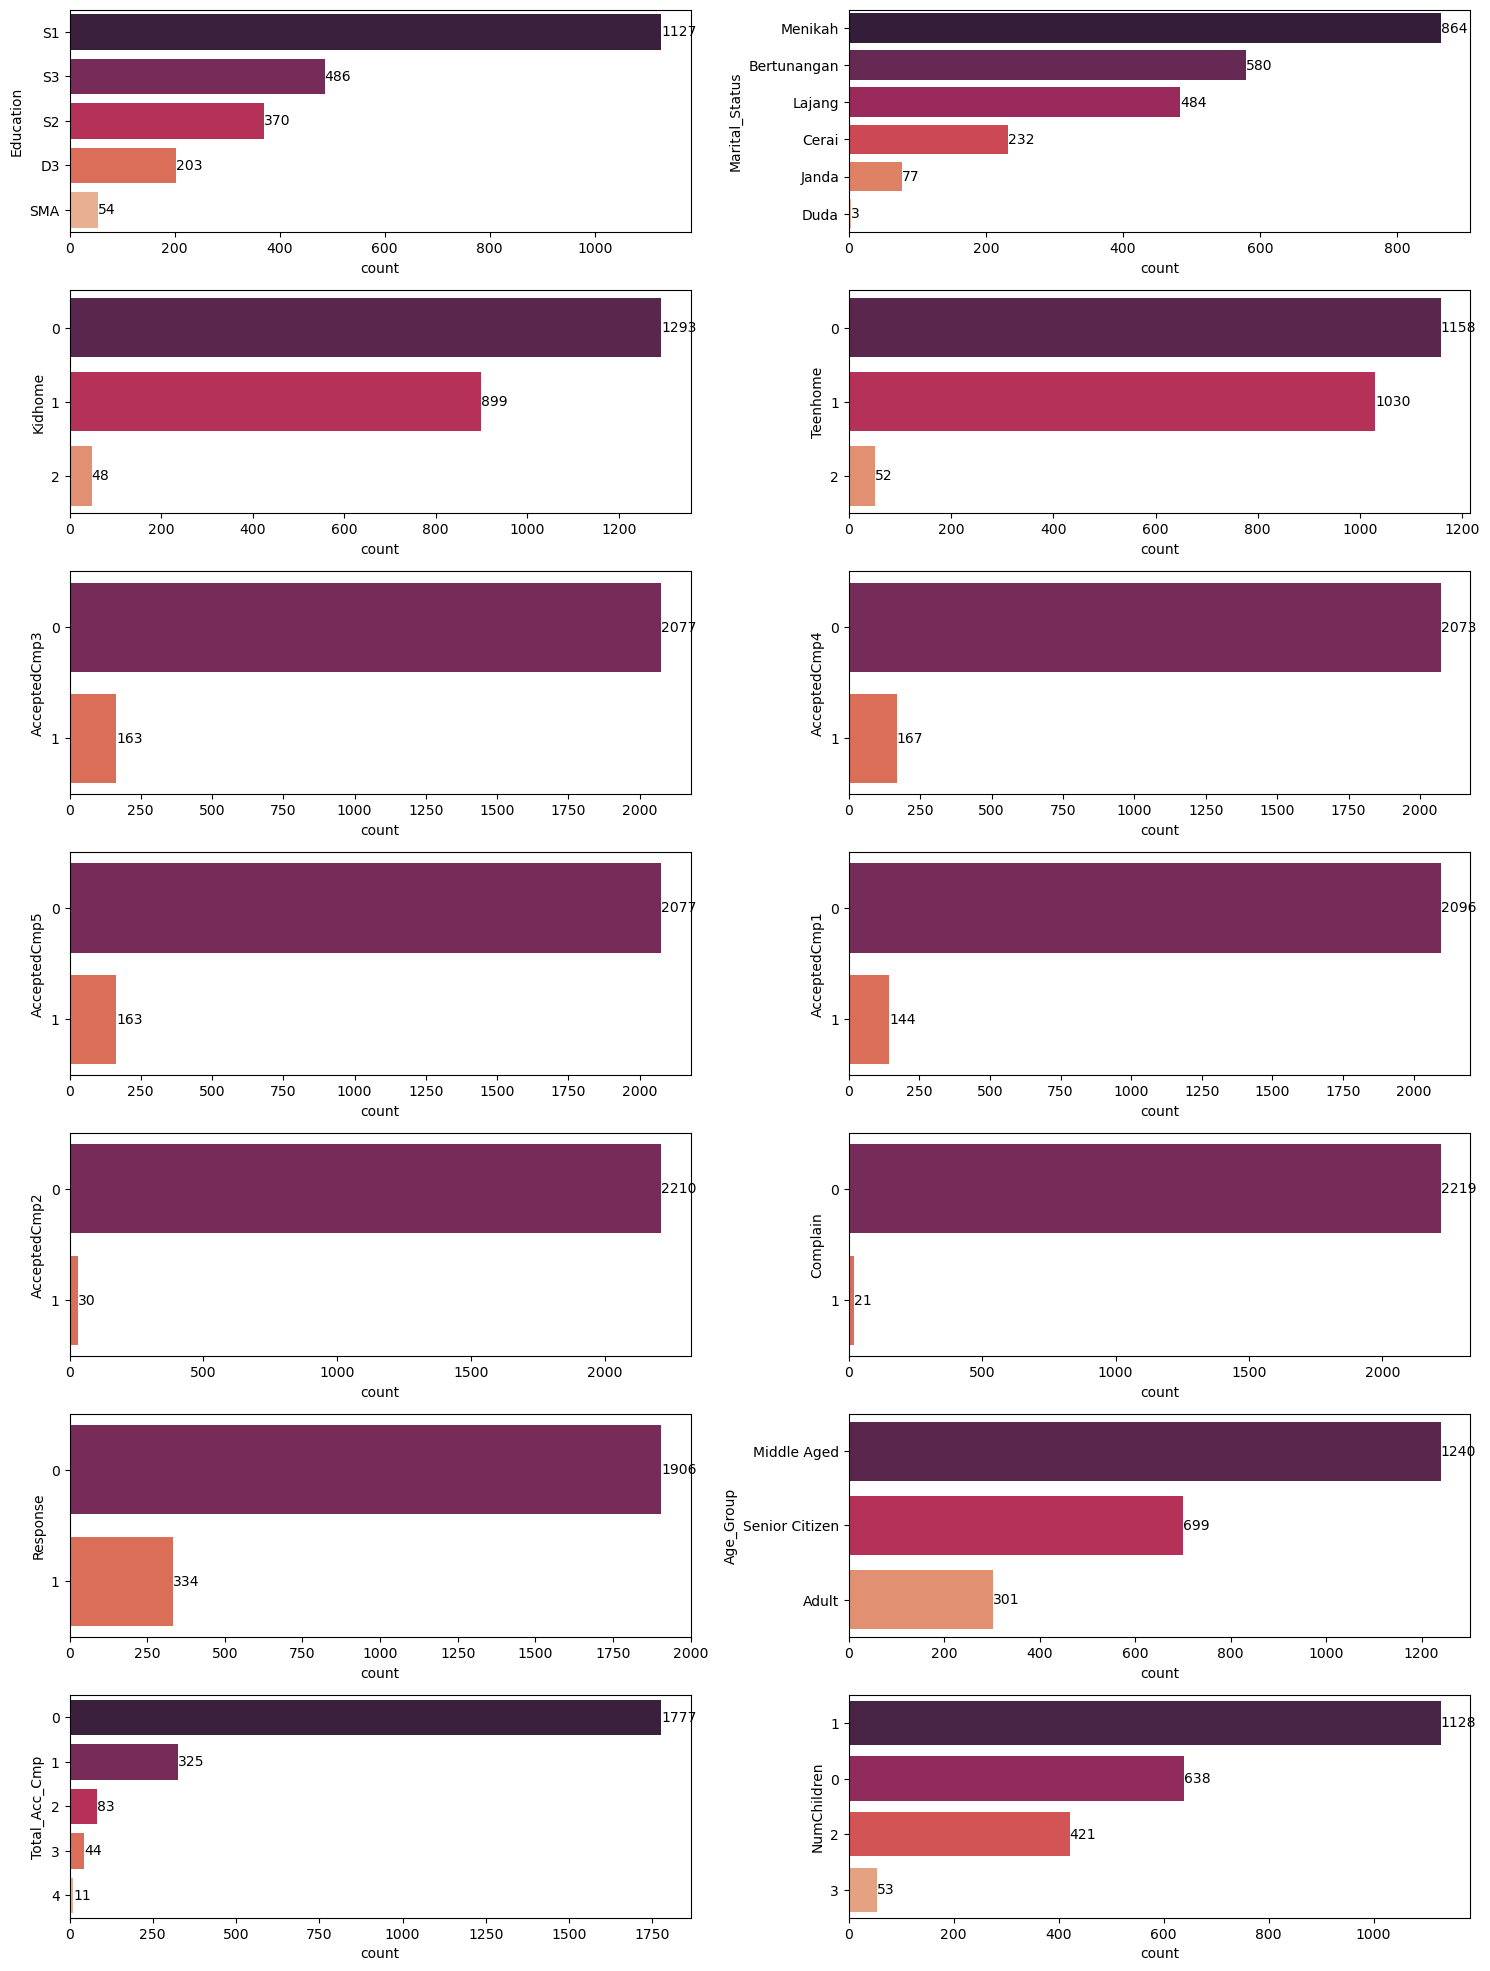

In [29]:
plt.figure(figsize=(15, 25))
for i in range(len(cat)):
    plt.subplot(9, 2, i+1)
    ax = sns.countplot(y=cat[i], data=df3, palette='rocket', order=df3[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

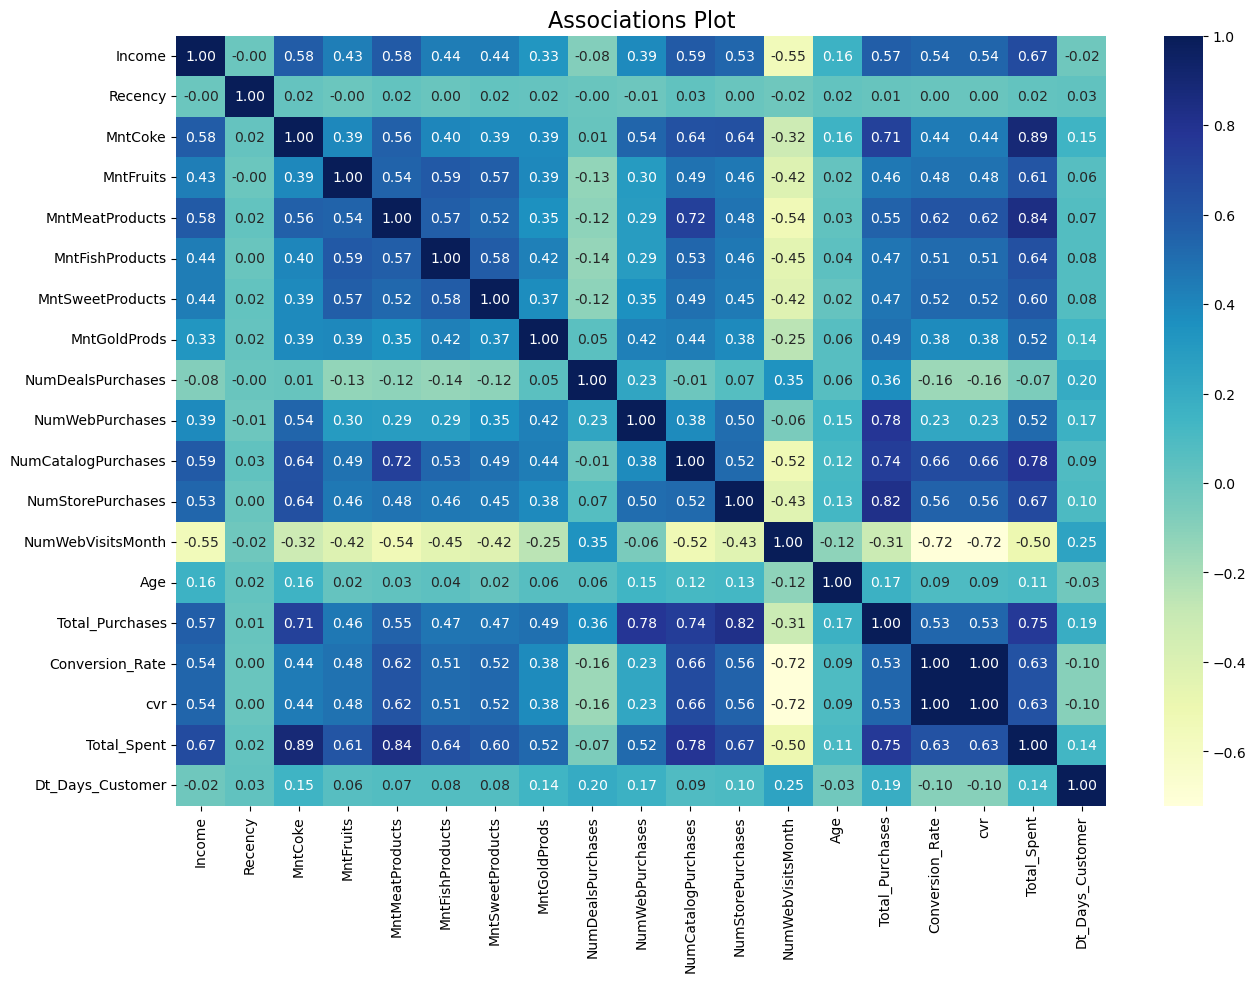

In [59]:
corr_matrix = df3.corr()

cmap = 'YlGnBu'

# Create the associations plot using seaborn's heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f")
plt.title('Associations Plot', fontsize=16)
plt.show()


In [41]:
df_task1 = df3.groupby('Age_Group').agg({'cvr':'sum'}).reset_index()
df_task1['sum_cvr'] = df_task1['cvr'].sum()
df_task1['pct'] = round((df_task1['cvr']/df_task1['sum_cvr'])*100, 2)
df_task1

Age_Group          cvr      sum_cvr    pct
0           Adult  1396.827026  9845.297974  14.19
1     Middle Aged  4731.134441  9845.297974  48.05
2  Senior Citizen  3717.336508  9845.297974  37.76

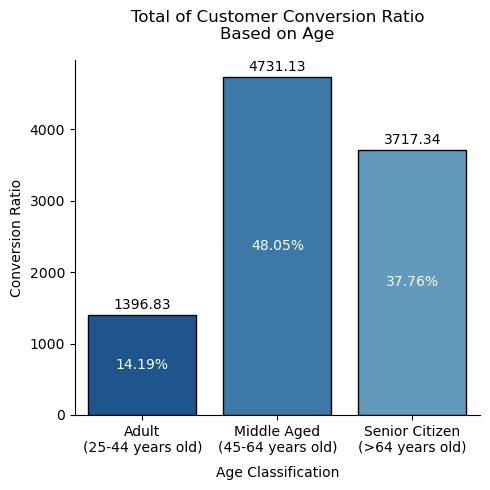

In [56]:
custom_palette = sns.color_palette("Blues_r")

fig, ax = plt.subplots(figsize=(5, 5))

plt.title("Total of Customer Conversion Ratio\nBased on Age", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='Age_Group', y='cvr', data=df_task1, edgecolor='black', palette=custom_palette)  # Use the custom navy blue palette

plt.ylabel('Conversion Ratio')
plt.xlabel('Age Classification', labelpad=8)
plt.xticks(np.arange(3), ['Adult\n(25-44 years old)', 'Middle Aged\n(45-64 years old)', 'Senior Citizen\n(>64 years old)'])

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['14.19%', '48.05%', '37.76%'], label_type='center', color='white', weight='bold')  # Change label color to white

sns.despine()
plt.tight_layout()
plt.savefig('customer_cvr.png')


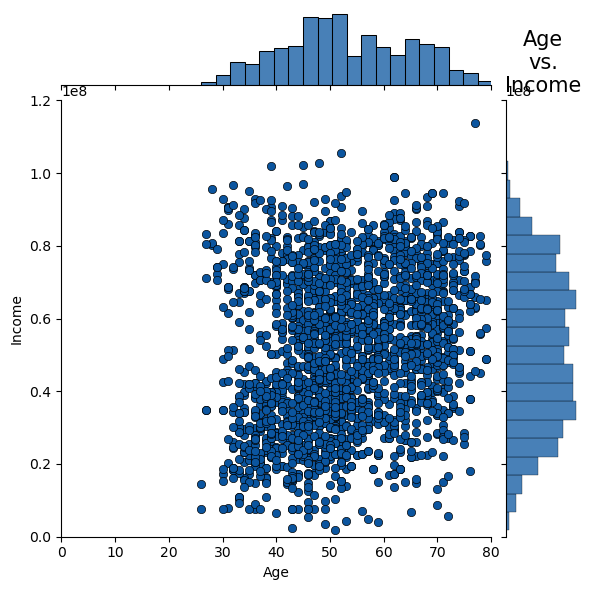

In [58]:
sns.set_palette("Blues_r")

plot = sns.jointplot(x=df3['Age'], y=df3['Income'], edgecolor='black')
plt.title('Age\nvs.\nIncome', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.savefig('age_income_jointplot.png')
plt.show()


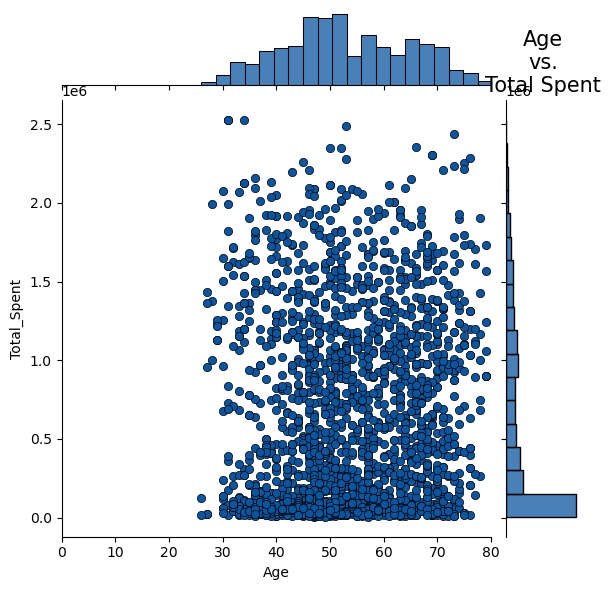

In [65]:
sns.set_palette("Blues_r")

# Create the joint plot for 'Age vs. Total Spent'
plot = sns.jointplot(x=df3['Age'], y=df3['Total_Spent'], edgecolor='black')
plt.title('Age\nvs.\nTotal Spent', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 80)
plt.savefig('age_totspent_jointplot.png')
plt.show()


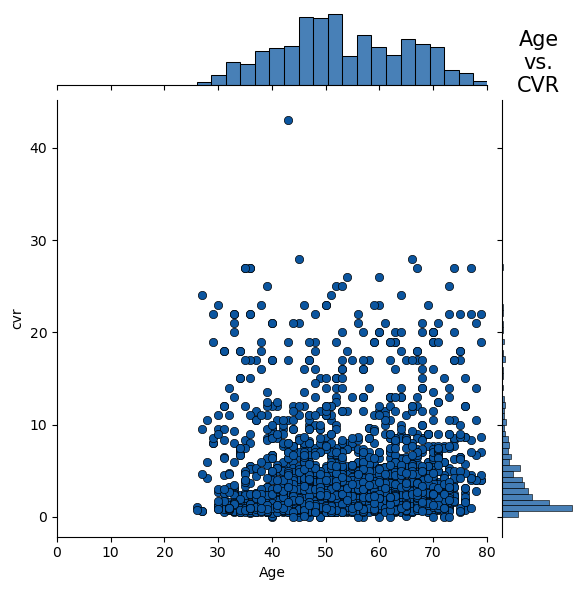

In [67]:
sns.set_palette("Blues_r")

# Create the joint plot for 'Age vs. CVR'
plot = sns.jointplot(x=df3['Age'], y=df3['cvr'], edgecolor='black')
plt.title('Age\nvs.\nCVR', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 80)
plt.savefig('age_cvr_jointplot.png')
plt.show()


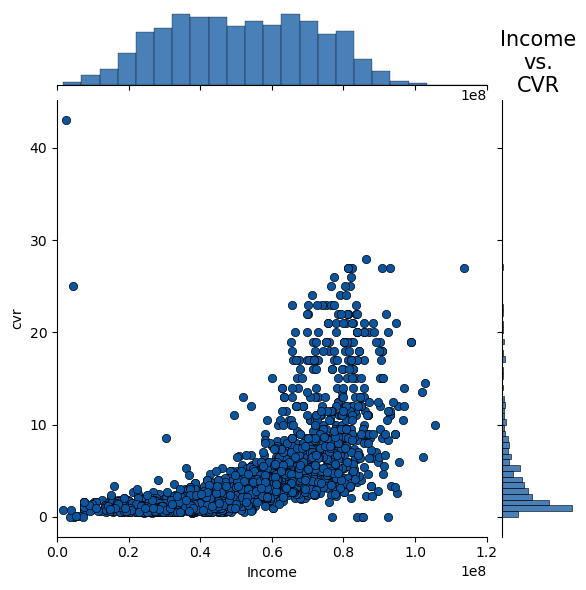

In [68]:
sns.set_palette("Blues_r")

# Create the joint plot for 'Income vs. CVR'
plot = sns.jointplot(x=df3['Income'], y=df3['cvr'], edgecolor='black')
plt.title('Income\nvs.\nCVR', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 120000000)
plt.savefig('income_cvr_jointplot.png')
plt.show()


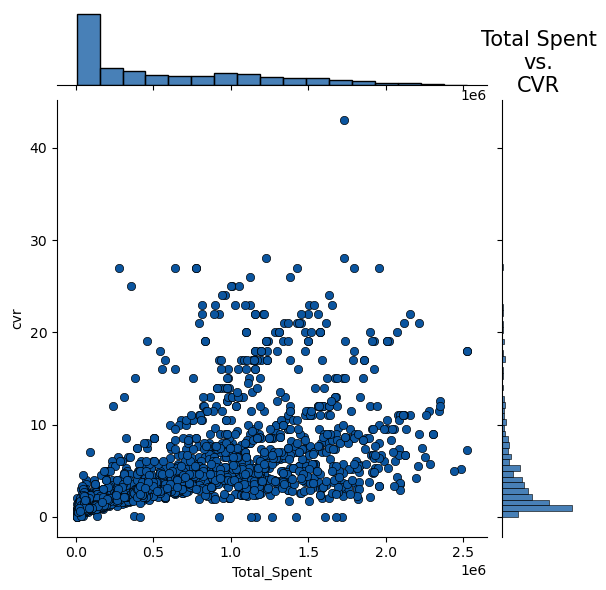

<Figure size 640x480 with 0 Axes>

In [69]:
sns.set_palette("Blues_r")

# Create the joint plot for 'Total Spent vs. CVR'
plot = sns.jointplot(x=df3['Total_Spent'], y=df3['cvr'], edgecolor='black')
plt.title('Total Spent\nvs.\nCVR', fontsize=15, weight='bold')
plt.savefig('totspent_cvr_jointplot.png')
plt.show()
plt.tight_layout()


## Data Preprocessing

In [72]:
df_pre = df3.copy()

In [73]:
missing_value = df_pre.isna().sum()*100/len(df_pre)
print(round(missing_value, 4).sort_values(ascending=False))

Income                 1.0714
Education              0.0000
Total_Purchases        0.0000
AcceptedCmp5           0.0000
AcceptedCmp1           0.0000
AcceptedCmp2           0.0000
Complain               0.0000
Response               0.0000
Age                    0.0000
Conversion_Rate        0.0000
AcceptedCmp3           0.0000
Age_Group              0.0000
Total_Acc_Cmp          0.0000
cvr                    0.0000
Total_Spent            0.0000
NumChildren            0.0000
AcceptedCmp4           0.0000
NumWebVisitsMonth      0.0000
Marital_Status         0.0000
NumStorePurchases      0.0000
NumCatalogPurchases    0.0000
NumWebPurchases        0.0000
NumDealsPurchases      0.0000
MntGoldProds           0.0000
MntSweetProducts       0.0000
MntFishProducts        0.0000
MntMeatProducts        0.0000
MntFruits              0.0000
MntCoke                0.0000
Recency                0.0000
Dt_Customer            0.0000
Teenhome               0.0000
Kidhome                0.0000
Dt_Days_Cu

In [74]:
#fill income missing value wih median
df_pre['Income'] = df_pre['Income'].fillna(df_pre['Income'].median())

In [75]:
df_pre.duplicated().sum()

183

In [76]:
df2[df2.duplicated(keep='first')].head(10)

Education Marital_Status      Income  Kidhome  Teenhome Dt_Customer  \
83         S2    Bertunangan  38620000.0        0         0  2013-11-05   
179        D3        Menikah  78497000.0        0         0  2013-01-12   
281        S1    Bertunangan  51369000.0        0         1  2012-10-25   
282        S1    Bertunangan  37760000.0        0         0  2012-08-31   
363        S3        Menikah  37717000.0        1         0  2012-11-23   
383        D3        Menikah  35688000.0        2         1  2012-08-22   
421        S1        Menikah  30096000.0        1         0  2014-05-22   
443        S1         Lajang  30279000.0        1         0  2012-12-30   
463        S1        Menikah  80124000.0        0         0  2014-06-26   
504        S2    Bertunangan  50943000.0        0         1  2013-06-21   

     Recency  MntCoke  MntFruits  MntMeatProducts  ...  Response  Age  \
83        56   112000      17000            44000  ...         0   59   
179       44   207000      26000           447000  ...         0   71   
281       84   297000       7000            79000  ...         0   46   
282       20    84000       5000            38000  ...         0   76   
363       31     9000          0             6000  ...         0   44   
383       94    73000       3000            90000  ...         0   49   
421       30     5000       3000            11000  ...         0   39   
443       13    10000       4000            14000  ...         0   33   
463       47   483000      84000           398000  ...         0   59   
504       49    31000          0             7000  ...         0   66   

     Total_Purchases  Conversion_Rate       Age_Group  Total_Acc_Cmp  \
83                11         3.666667     Middle Aged              0   
179               25        12.500000  Senior Citizen              1   
281               16         2.000000     Middle Aged              0   
282               13         1.857143  Senior Citizen              0   
363                4         0.444444     Middle Aged              0   
383               16         2.000000     Middle Aged              0   
421                6         1.000000           Adult              0   
443                5         0.625000           Adult              0   
463               19        19.000000     Middle Aged              1   
504                5         1.000000  Senior Citizen              0   

           cvr  Total_Spent  NumChildren  Dt_Days_Customer  
83    3.666667       318000            0              3558  
179  12.500000       978000            0              3855  
281   2.000000       576000            1              3934  
282   1.857143       317000            0              3989  
363   0.444444        25000            1              3905  
383   2.000000       211000            3              3998  
421   1.000000        45000            1              3360  
443   0.625000        37000            1              3868  
463  19.000000      1495000            0              3325  
504   1.000000        46000            1              3695  

[10 rows x 34 columns]

In [77]:
df2[df2.duplicated(keep='last')].head(10)

Education Marital_Status      Income  Kidhome  Teenhome Dt_Customer  \
15        S3         Lajang  82800000.0        0         0  2012-11-24   
17        S1    Bertunangan  37760000.0        0         0  2012-08-31   
23        S3        Menikah  65324000.0        0         1  2014-11-01   
24        S1    Bertunangan  40689000.0        0         1  2013-03-18   
29        S3        Menikah  84618000.0        0         0  2013-11-22   
30        S2          Cerai  10979000.0        0         0  2014-05-22   
31        S2    Bertunangan  38620000.0        0         0  2013-11-05   
38        S1          Janda  42429000.0        0         1  2014-11-02   
39        S3          Cerai  48948000.0        0         0  2013-01-02   
42        S1    Bertunangan  21994000.0        0         1  2012-12-24   

    Recency  MntCoke  MntFruits  MntMeatProducts  ...  Response  Age  \
15       23  1006000      22000           115000  ...         1   76   
17       20    84000       5000            38000  ...         0   76   
23        0   384000          0           102000  ...         0   68   
24       69   270000       3000            27000  ...         0   71   
29       96   684000     100000           801000  ...         0   57   
30       34     8000       4000            10000  ...         0   33   
31       56   112000      17000            44000  ...         0   59   
38       99    55000          0             6000  ...         0   49   
39       53   437000       8000           206000  ...         1   79   
42        4     9000          0             6000  ...         0   65   

    Total_Purchases  Conversion_Rate       Age_Group  Total_Acc_Cmp  \
15               26         8.666667  Senior Citizen              2   
17               13         1.857143  Senior Citizen              0   
23               20         5.000000  Senior Citizen              0   
24               20         2.500000  Senior Citizen              0   
29               26        13.000000     Middle Aged              1   
30                8         1.600000           Adult              0   
31               11         3.666667     Middle Aged              0   
38                7         1.400000     Middle Aged              0   
39               24         4.000000  Senior Citizen              1   
42                4         0.800000  Senior Citizen              0   

          cvr  Total_Spent  NumChildren  Dt_Days_Customer  
15   8.666667      1315000            0              3904  
17   1.857143       317000            0              3989  
23   5.000000       544000            1              3197  
24   2.500000       444000            1              3790  
29  13.000000      1672000            0              3541  
30   1.600000        30000            0              3360  
31   3.666667       318000            0              3558  
38   1.400000        67000            1              3196  
39   4.000000       902000            0              3865  
42   0.800000        22000            1              3874  

[10 rows x 34 columns]

Dari fungsi .duplicated() yang sudah dijalankan diatas, terdapat 183 baris data yang duplikat. Namun, ketika dilihat secara manual, ternyata tidak ada duplikat pada baris manapun. Untuk itu, dibuatlah keputusan untuk tidak menghilangkan data dari datu baris manapun.

## *Drop Unnecesary Feature*

In [78]:
df_pre.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                'MntCoke','MntFishProducts','MntFruits','MntMeatProducts','MntSweetProducts', 'MntGoldProds',
                'Kidhome','Teenhome', 'Response'], inplace=True, axis=1)

In [80]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dython (from versions: none)
ERROR: No matching distribution found for dython


In [83]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2240 non-null   object        
 1   Marital_Status     2240 non-null   object        
 2   Income             2240 non-null   float64       
 3   Dt_Customer        2240 non-null   datetime64[ns]
 4   Recency            2240 non-null   int64         
 5   NumWebVisitsMonth  2240 non-null   int64         
 6   Complain           2240 non-null   object        
 7   Age                2240 non-null   int64         
 8   Total_Purchases    2240 non-null   int64         
 9   Conversion_Rate    2240 non-null   float64       
 10  Age_Group          2240 non-null   object        
 11  Total_Acc_Cmp      2240 non-null   object        
 12  cvr                2240 non-null   float64       
 13  Total_Spent        2240 non-null   int64         
 14  NumChild

In [85]:
df_pre.shape

(2240, 16)

### Feature Selection

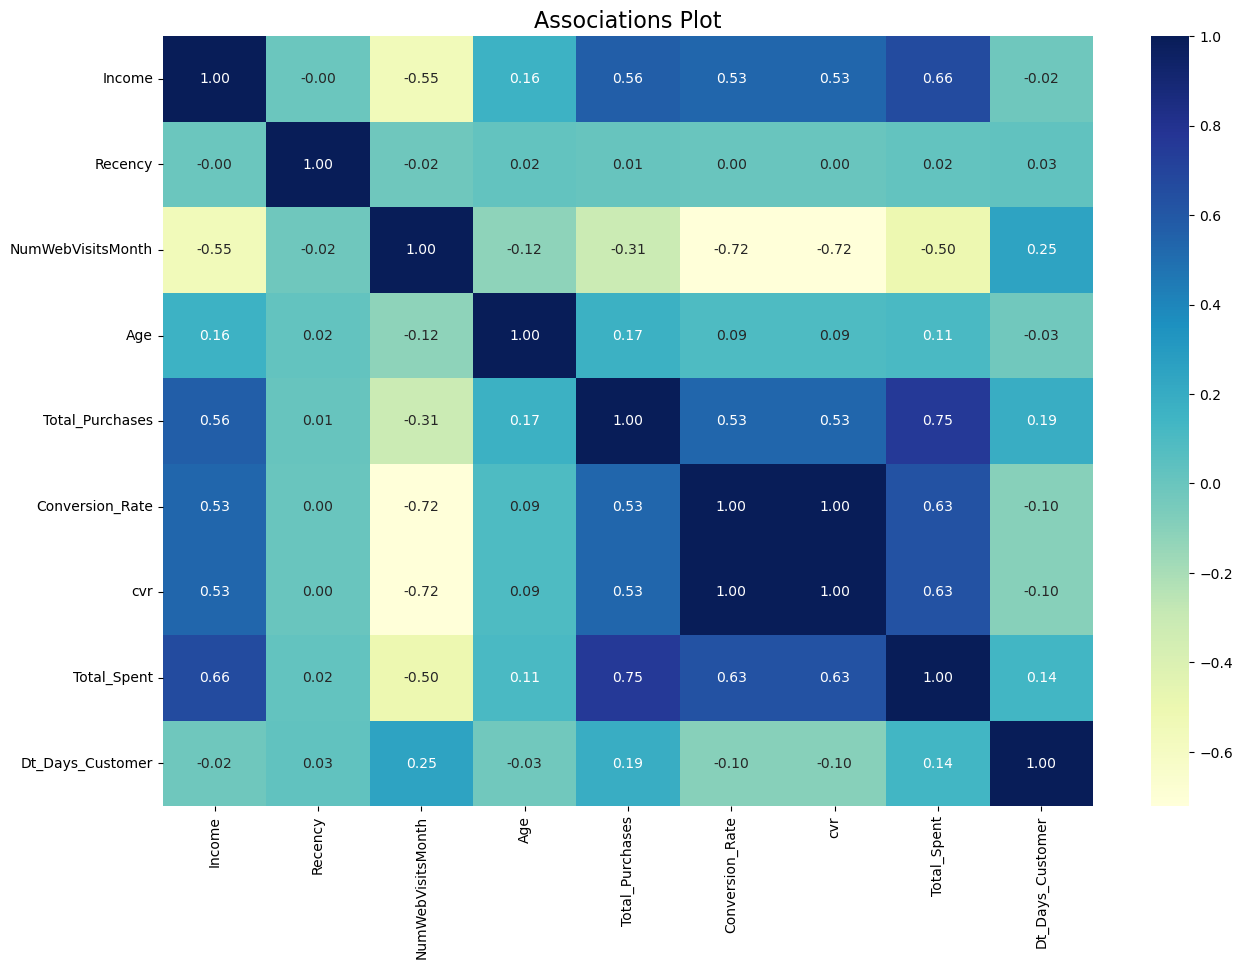

<Figure size 640x480 with 0 Axes>

In [90]:
corr_matrix = df_pre.corr()

cmap = 'YlGnBu'

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f")
plt.title('Associations Plot', fontsize=16)
plt.show()

plt.savefig('associations_plot.png')
plt.show()


Kolom yang dipilih berdasarkan RFM degan metode reduce dimensionality diantaranya:

R: Recency
F: Total_Purchases
M: Spent
L: Age
C: Total_Acc_Cmp

In [91]:
df_m = df_pre.copy()
df_m = df_m[['Recency', 'Total_Purchases', 'Total_Spent', 'Dt_Days_Customer', 'Age']]
df_m.columns = ['R', 'F', 'M', 'L', 'C']
df_m.describe(include='all')

R            F             M            L            C
count  2240.000000  2240.000000  2.240000e+03  2240.000000  2240.000000
mean     49.109375    14.862054  6.057982e+05  3674.043304    53.194196
std      28.962453     7.677173  6.022493e+05   232.229893    11.984069
min       0.000000     0.000000  5.000000e+03  3162.000000    26.000000
25%      24.000000     8.000000  6.875000e+04  3502.750000    45.000000
50%      49.000000    15.000000  3.960000e+05  3675.000000    52.000000
75%      74.000000    21.000000  1.045500e+06  3847.250000    63.000000
max      99.000000    44.000000  2.525000e+06  4225.000000   129.000000

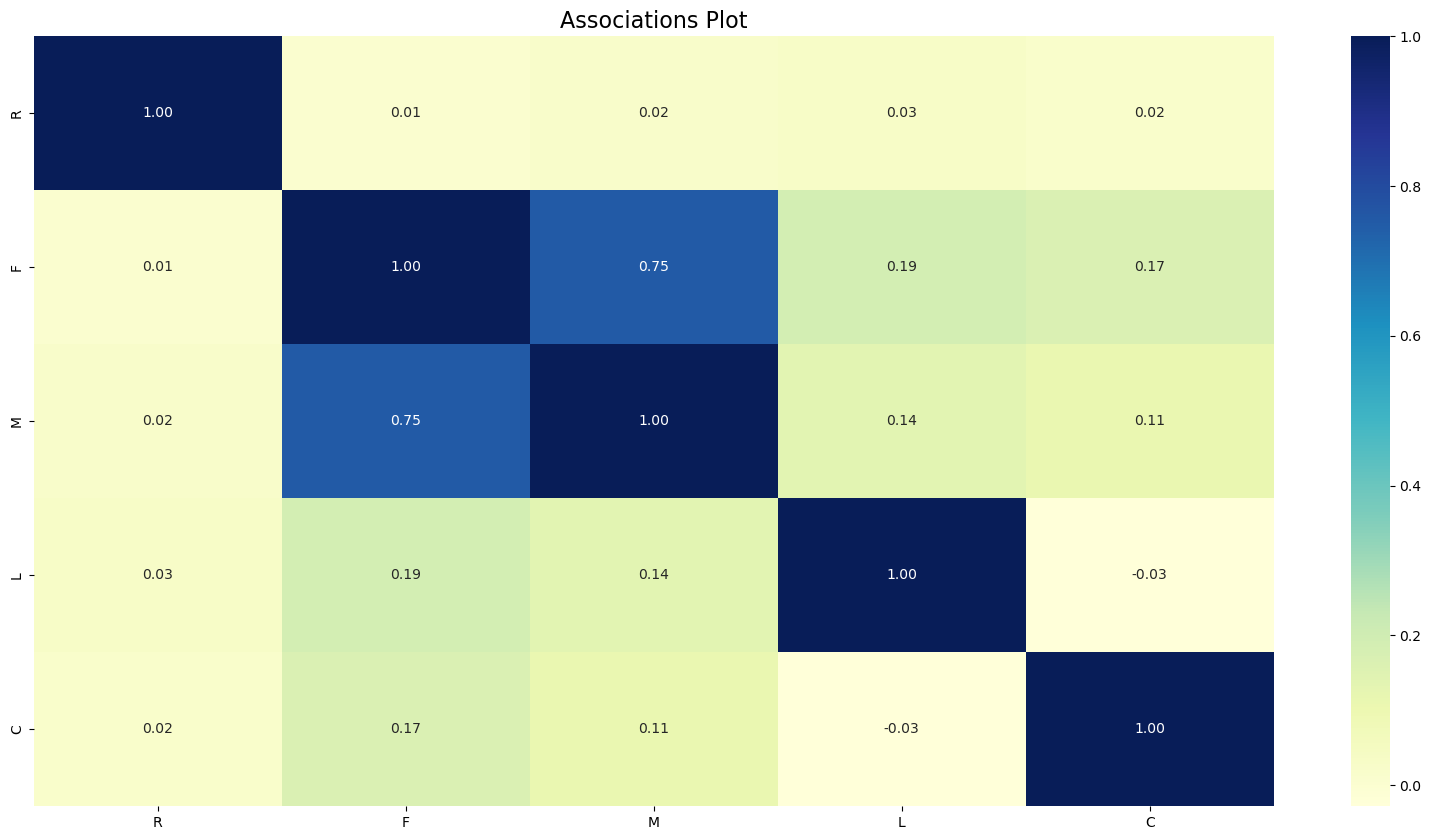

In [94]:
corr_matrix = df_m.corr()

cmap = 'YlGnBu'

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f")
plt.title('Associations Plot', fontsize=16)
plt.show()


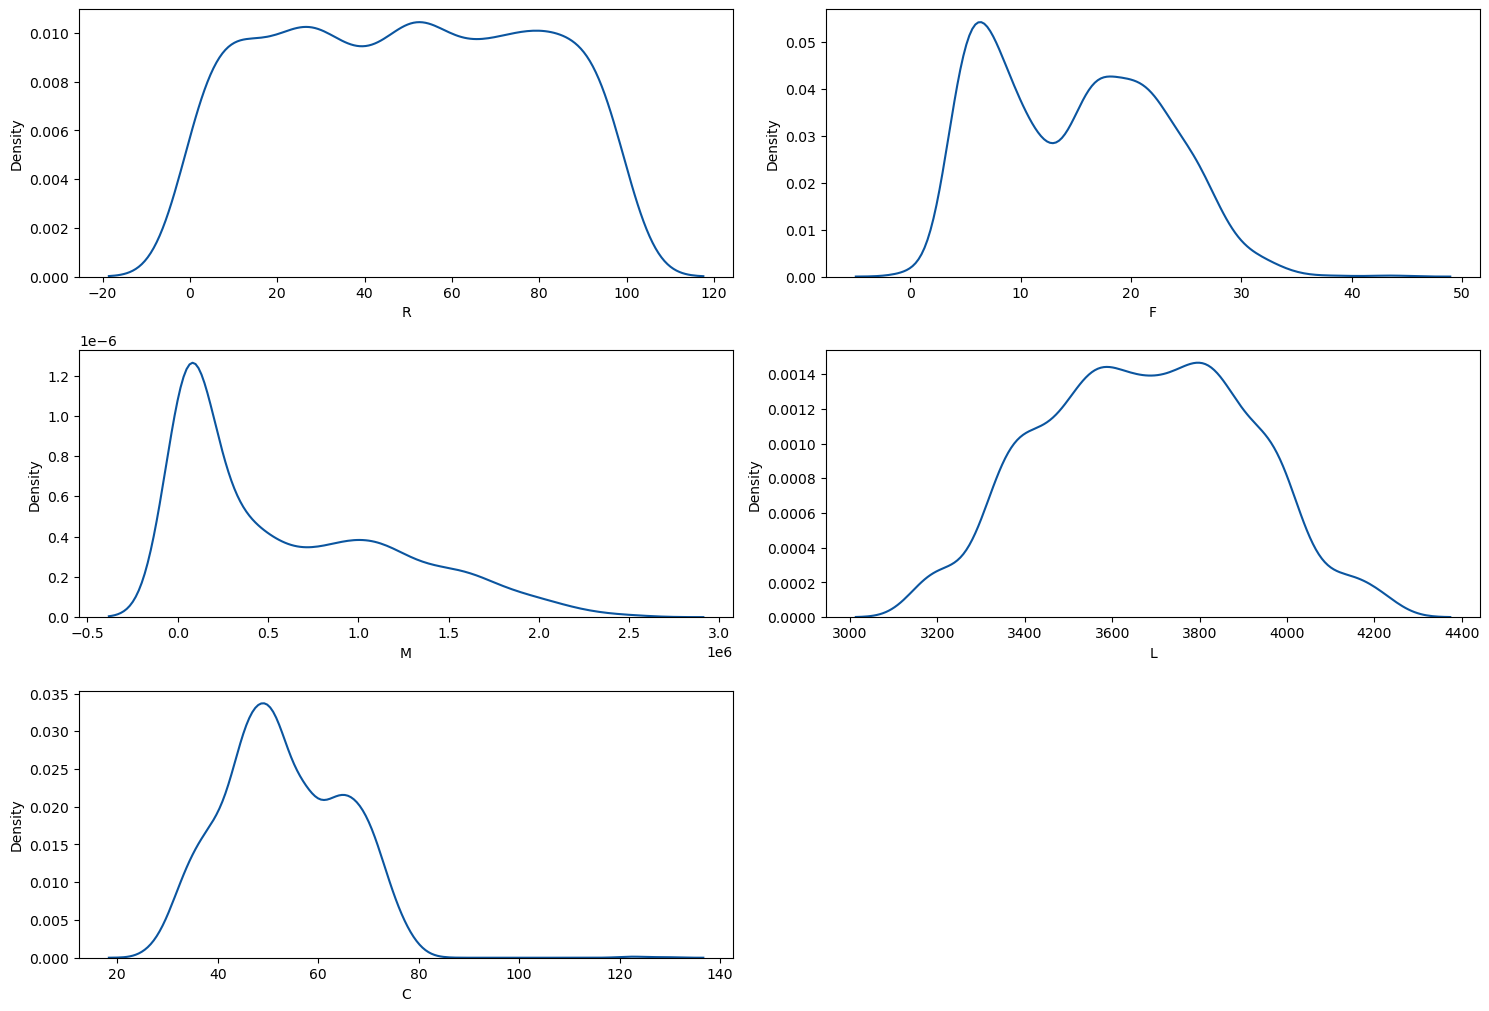

In [97]:
cols = df_m.columns

plt.figure(figsize= (15, 20))
for i in range(len(cols)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x = df_m[cols[i]])
    plt.tight_layout()

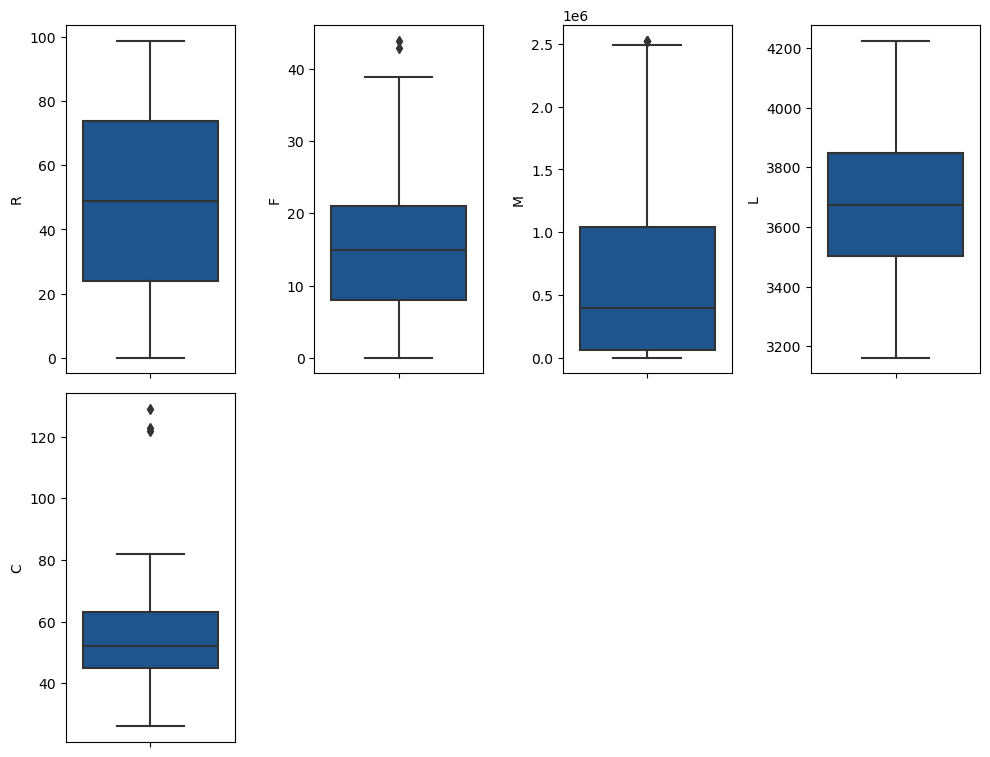

In [98]:
cols = df_m.columns
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df_m[cols[i]], orient='v')
    plt.tight_layout()

In [99]:
for col in cols:
    high_cut = df_m[col].quantile(q=0.99)
    low_cut= df_m[col].quantile(q=0.01)
    df_m.loc[df_m[col]>high_cut,col]=high_cut
    df_m.loc[df_m[col]<low_cut,col]=low_cut

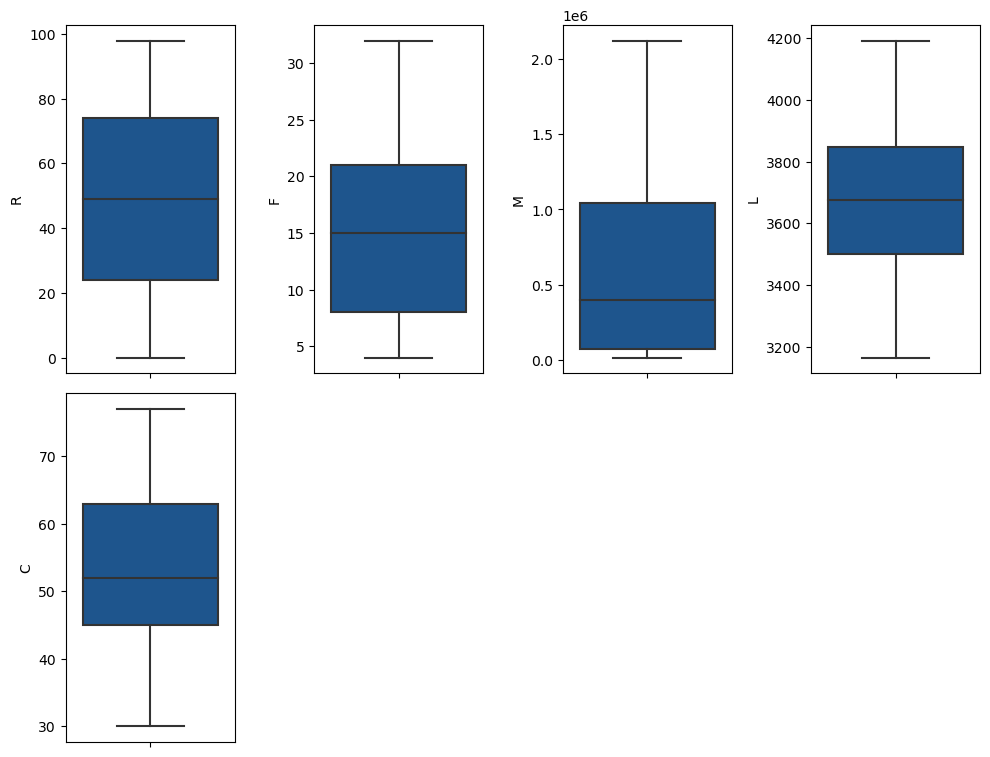

In [100]:
cols = df_m.columns
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df_m[cols[i]], orient='v')
    plt.tight_layout()

### Feature Transformation

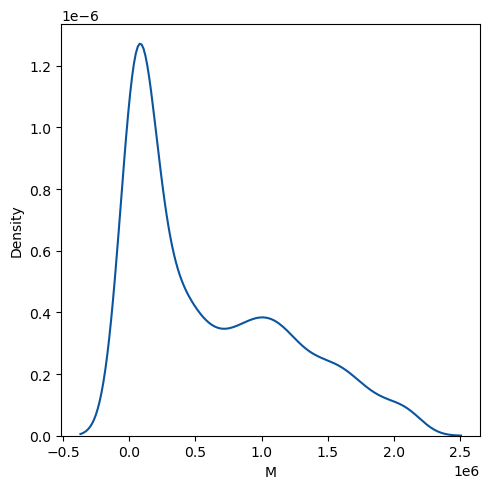

In [101]:
#column M distribution is right-skewed

plt.figure(figsize= (5, 5))
sns.kdeplot(x = df_m['M'])
plt.tight_layout()

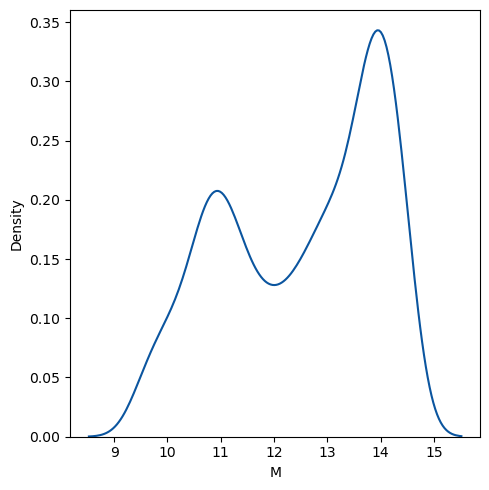

In [103]:
#log tranformation on column `M`

df_m_log = df_m.copy()
df_m_log['M'] = np.log(df_m['M'])

plt.figure(figsize= (5, 5))
sns.kdeplot(x = df_m_log['M'])
plt.tight_layout()

In [105]:
df_m_log.describe()

R            F            M            L            C
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000
mean     49.101786    14.854911    12.520340  3673.836174    53.132143
std      28.949501     7.591392     1.475319   231.617801    11.666094
min       0.000000     4.000000     9.472705  3167.000000    30.000000
25%      24.000000     8.000000    11.138212  3502.750000    45.000000
50%      49.000000    15.000000    12.889169  3675.000000    52.000000
75%      74.000000    21.000000    13.860005  3847.250000    63.000000
max      98.000000    32.000000    14.569753  4190.610000    77.000000

In [106]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [107]:
col_name = list(df_m_log.columns)

mm = MinMaxScaler()
df_std_mm = mm.fit_transform(df_m_log)
df_std_mm = pd.DataFrame(df_std_mm, columns=col_name)
df_std_mm.sample(10)

R         F         M         L         C
419   0.040816  0.892857  0.795844  0.563691  0.446809
646   0.367347  0.928571  0.958879  0.663339  0.468085
1354  0.102041  0.571429  0.938638  0.792294  0.212766
1158  0.193878  0.250000  0.913787  0.181710  0.659574
985   0.438776  0.428571  0.674692  0.456228  0.382979
1586  0.530612  0.285714  0.503223  0.814763  0.851064
444   1.000000  0.035714  0.188621  0.253026  0.382979
1072  0.846939  0.678571  0.799724  0.714139  0.787234
1143  0.775510  0.142857  0.370685  0.460136  0.638298
737   0.295918  0.321429  0.636877  0.263772  0.851064

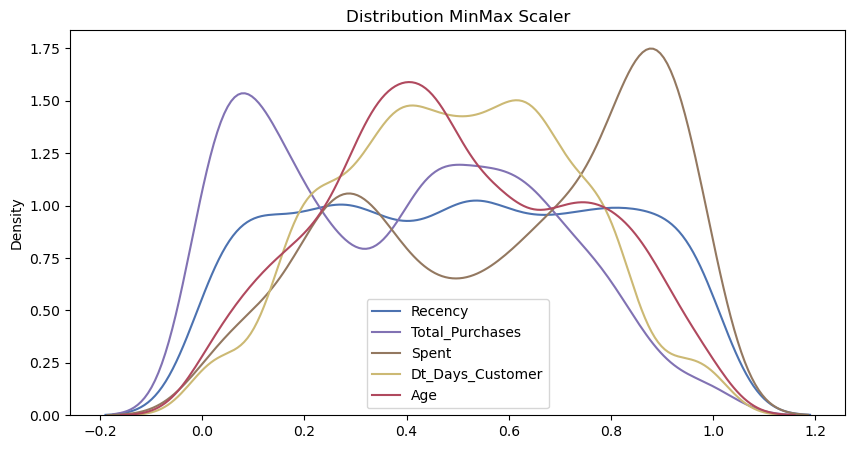

In [140]:
# Custom colors for each variable
variable_colors = ['#4c72b0', '#8172b3', '#937860', '#ccb974', '#b0495e']

plt.figure(figsize=(10, 5))
plt.title('Distribution MinMax Scaler')

sns.kdeplot(df_std_mm['R'], label='Recency', color=variable_colors[0])
sns.kdeplot(df_std_mm['F'], label='Total_Purchases', color=variable_colors[1])
sns.kdeplot(df_std_mm['M'], label='Spent', color=variable_colors[2])
sns.kdeplot(df_std_mm['L'], label='Dt_Days_Customer', color=variable_colors[3])
sns.kdeplot(df_std_mm['C'], label='Age', color=variable_colors[4])

plt.xlabel(None)
plt.legend()
plt.show()


In [109]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_std_mm.describe()

R        F        M        L        C
count 2240.000 2240.000 2240.000 2240.000 2240.000
mean     0.501    0.388    0.598    0.495    0.492
std      0.295    0.271    0.289    0.226    0.248
min      0.000    0.000    0.000    0.000    0.000
25%      0.245    0.143    0.327    0.328    0.319
50%      0.500    0.393    0.670    0.496    0.468
75%      0.755    0.607    0.861    0.665    0.702
max      1.000    1.000    1.000    1.000    1.000

## Model and Evaluation

### Inertia

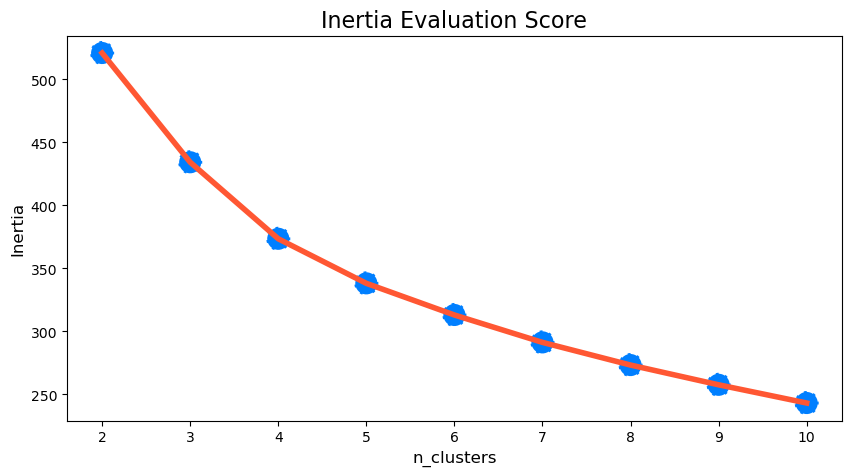

In [111]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std_mm)
    inertia.append(kmeans.inertia_)

line_color = '#FF5733'
scatter_color = '#007FFF'

plt.figure(figsize=(10, 5))
plt.title('Inertia Evaluation Score', fontsize=16, weight='bold')
sns.lineplot(x=range(2, 11), y=inertia, color=line_color, linewidth=4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color=scatter_color, linestyle='--')
plt.xlabel('n_clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.show()


### Silhoutte

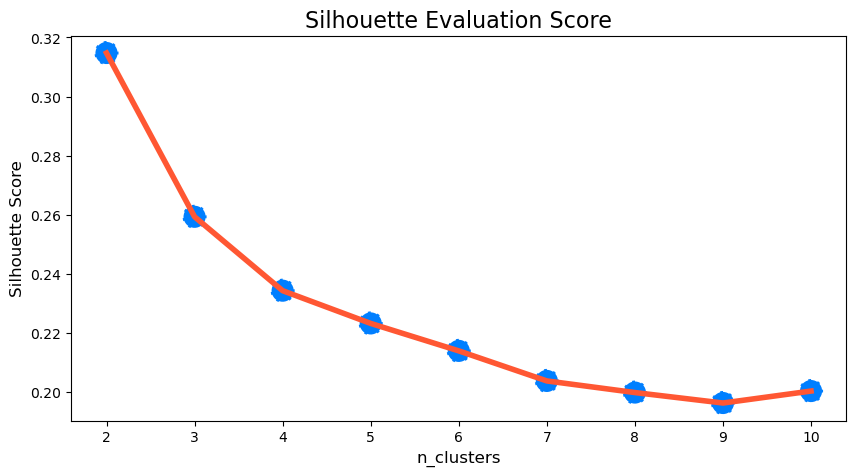

In [113]:
range_n_clusters = list(range(2, 11))
arr_silhouette_score_euclidean = []

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std_mm)
    preds = kmeans.predict(df_std_mm)
    score_euclidean = silhouette_score(df_std_mm, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

# Set different colors for the line plot and scatter plot
line_color = '#FF5733'
scatter_color = '#007FFF'

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Silhouette Evaluation Score', fontsize=16, weight='bold')
sns.lineplot(x=range(2, 11), y=arr_silhouette_score_euclidean, color=line_color, linewidth=4)
sns.scatterplot(x=range(2, 11), y=arr_silhouette_score_euclidean, s=300, color=scatter_color, linestyle='--')
plt.xlabel('n_clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.show()


In [117]:
df_std_cluster = df_std_mm.copy()
df_cluster = df_m.copy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std_mm)
df_std_cluster['clusters'] = kmeans.labels_
df_cluster['clusters'] = kmeans.labels_

### PCA

In [118]:
from sklearn.decomposition import PCA 

In [119]:
pca = PCA(n_components=2)

pca.fit(df_std_mm)
pcs = pca.transform(df_std_mm)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = df_cluster['clusters']
df_pca.sample(10)

PC 1   PC 2  clusters
2219 -0.094 -0.240         0
997   0.273 -0.366         1
1395 -0.373  0.488         2
959  -0.122  0.005         0
845  -0.342  0.084         2
1801 -0.638 -0.366         0
2090 -0.157  0.494         2
509  -0.445  0.005         0
524   0.176  0.134         3
56   -0.367  0.202         2

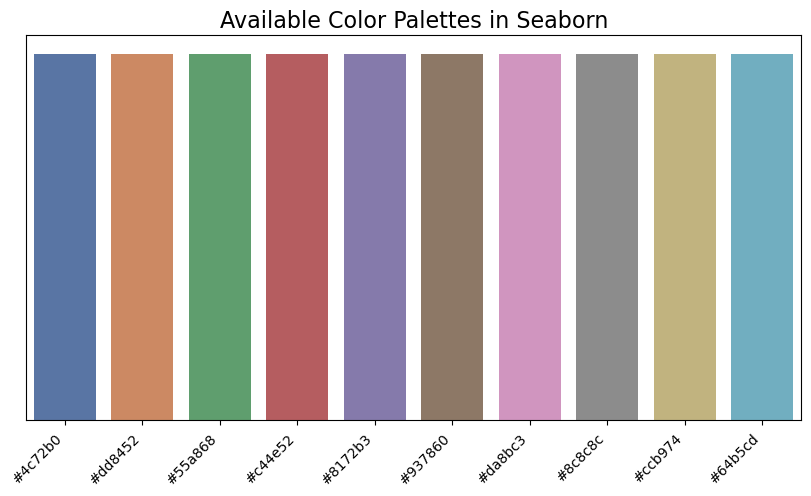

In [124]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters\nWih PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['blue','orange','green','red'],
    s=160,
    ax=ax
);

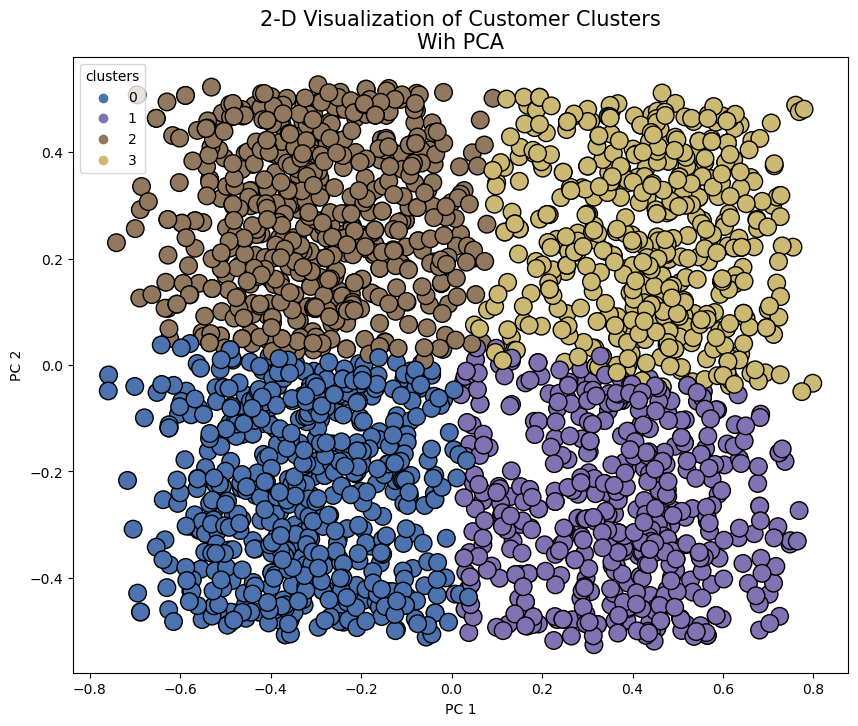

In [135]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters\nWih PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['#4c72b0', '#8172b3', '#937860', '#ccb974'],
    s=160,
    ax=ax
);

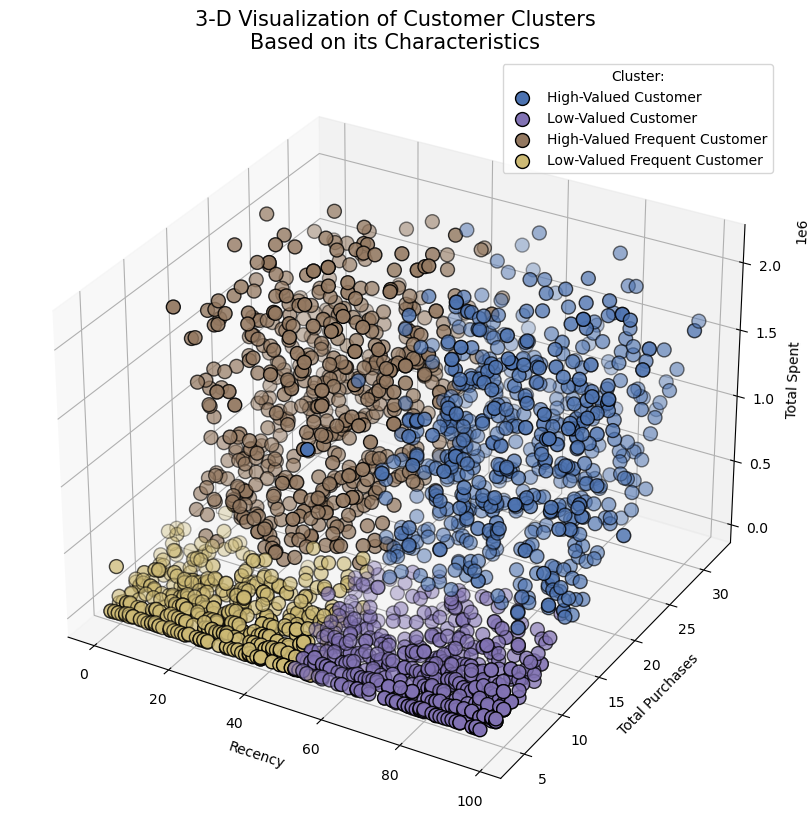

In [137]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on its Characteristics", fontsize=15, weight='bold')
cluster_palette = ['#4c72b0', '#8172b3', '#937860', '#ccb974']
ax.scatter(df_cluster['R'][df_cluster.clusters == 0], df_cluster['F'][df_cluster.clusters == 0], df_cluster['M'][df_cluster.clusters == 0], c=cluster_palette[0], s=100, edgecolor='black', label='High-Valued Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 1], df_cluster['F'][df_cluster.clusters == 1], df_cluster['M'][df_cluster.clusters == 1], c=cluster_palette[1], s=100, edgecolor='black', label='Low-Valued Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 2], df_cluster['F'][df_cluster.clusters == 2], df_cluster['M'][df_cluster.clusters == 2], c=cluster_palette[2], s=100, edgecolor='black', label='High-Valued Frequent Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 3], df_cluster['F'][df_cluster.clusters == 3], df_cluster['M'][df_cluster.clusters == 3], c=cluster_palette[3], s=100, edgecolor='black', label='Low-Valued Frequent Customer')

plt.xlabel('Recency')
plt.ylabel('Total Purchases')
ax.set_zlabel('Total Spent')
plt.legend(title='Cluster:')
plt.show()


Insight

In [128]:
display(df_cluster.groupby('clusters').agg(['mean','median', 'max', 'min']))

R                     F                          M             \
           mean median max min   mean median max min        mean     median   
clusters                                                                      
0        73.003 72.000  98  45 20.636 20.000  32   4 1031209.877 986500.000   
1        74.414 76.000  98  43  7.757  7.000  16   4   92622.718  65000.000   
2        22.918 23.000  49   0 20.592 20.000  32  10  985977.087 936000.000   
3        24.576 24.000  53   0  7.166  7.000  15   4   75397.541  57000.000   

                                 L                                 C         \
              max     min     mean   median      max      min   mean median   
clusters                                                                      
0         2126000  199000 3721.186 3729.000 4190.610 3167.000 55.864 56.000   
1          414000   13000 3632.107 3627.000 4190.610 3167.000 52.034 51.000   
2         2126000  215000 3695.965 3709.000 4190.610 3167.000 54.540 54.000   
3          393000   13000 3625.413 3607.000 4190.610 3167.000 48.850 48.000   

                  
         max min  
clusters          
0         77  30  
1         77  30  
2         77  30  
3         77  30

In [129]:
df_totalc = df_cluster.groupby('clusters').agg({'R':'count'}).reset_index()
df_totalc = df_totalc.rename(columns={'R':'total_customers'})
df_totalc['sum_customers'] = df_totalc['total_customers'].sum()
df_totalc['pct'] = round((df_totalc['total_customers']/df_totalc['sum_customers'])*100, 2)
df_totalc

clusters  total_customers  sum_customers    pct
0         0              648           2240 28.930
1         1              493           2240 22.010
2         2              611           2240 27.280
3         3              488           2240 21.790

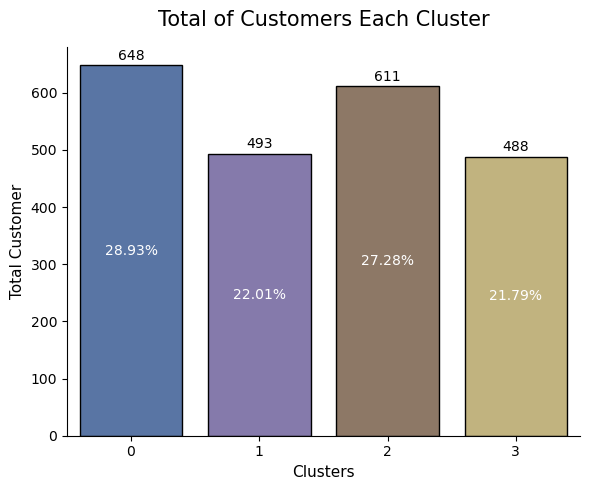

In [139]:
cluster_colors = ['#4c72b0', '#8172b3', '#937860', '#ccb974']

fig, ax = plt.subplots(figsize=(6, 5))
plt.title("Total of Customers Each Cluster", fontsize=15, color='black', weight='bold', pad=15)

sns.barplot(x='clusters', y='total_customers', data=df_totalc, edgecolor='black', palette=cluster_colors)

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['28.93%', '22.01%', '27.28%', '21.79%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()
plt.show()


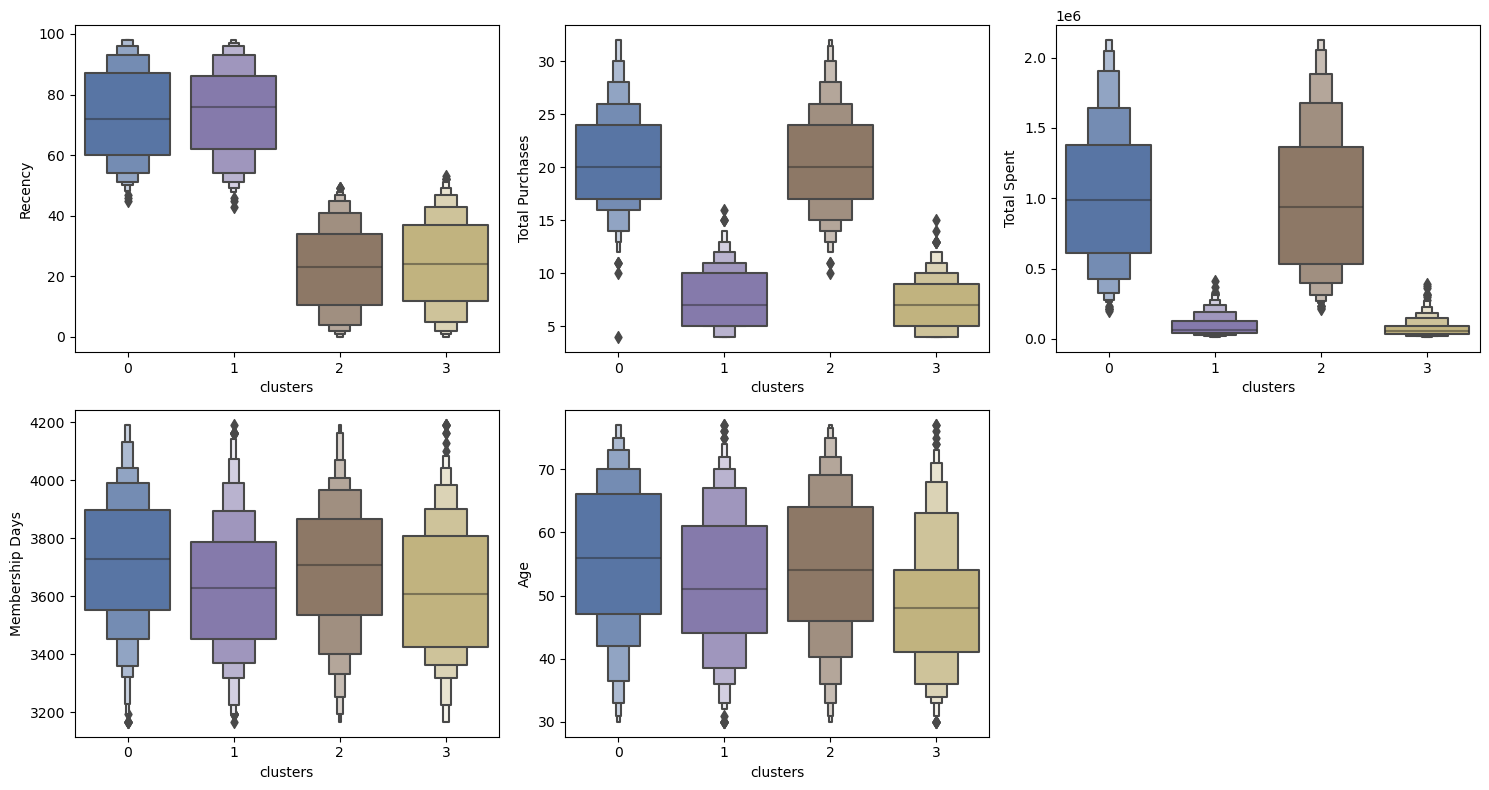

In [134]:
# Palet warna untuk setiap klaster
cluster_colors = ['#4c72b0', '#8172b3', '#937860', '#ccb974']

# Ubah nama kolom di df_cls
df_cls = df_cluster.copy()
df_cls.rename(columns={'R':'Recency','F':'Total Purchases','M':'Total Spent','L':'Membership Days','C':'Age'}, inplace=True)

cls = df_cls.columns.drop('clusters')

plt.figure(figsize= (15, 8))
for i in range(len(cls)):
    plt.subplot(2, 3, i+1)
    sns.boxenplot(x=df_cluster['clusters'], y=df_cls[cls[i]], palette=cluster_colors)
    plt.tight_layout()

plt.show()


In [141]:
df_pre['Clusters'] = kmeans.labels_
df_pre.head()

Education Marital_Status       Income Dt_Customer  Recency  \
0        S1         Lajang 58138000.000  2012-04-09       58   
1        S1         Lajang 46344000.000  2014-08-03       38   
2        S1    Bertunangan 71613000.000  2013-08-21       26   
3        S1    Bertunangan 26646000.000  2014-10-02       26   
4        S3        Menikah 58293000.000  2014-01-19       94   

   NumWebVisitsMonth Complain  Age  Total_Purchases  Conversion_Rate  \
0                  7        0   65               25            3.571   
1                  5        0   68                6            1.200   
2                  4        0   57               21            5.250   
3                  6        0   38                8            1.333   
4                  5        0   41               19            3.800   

        Age_Group Total_Acc_Cmp   cvr  Total_Spent NumChildren  \
0  Senior Citizen             0 3.571      1617000           0   
1  Senior Citizen             0 1.200        27000           2   
2     Middle Aged             0 5.250       776000           0   
3           Adult             0 1.333        53000           1   
4     Middle Aged             0 3.800       422000           1   

   Dt_Days_Customer  Clusters  
0              4133         0  
1              3287         3  
2              3634         2  
3              3227         3  
4              3483         0

In [142]:
df_age_clus = df_pre.groupby(['Clusters', 'Age_Group']).agg({'Education':'count'}).reset_index()
df_age_clus = df_age_clus.rename(columns={'Education':'total_customers'})
df_age_clus['sum_customers'] = df_age_clus['total_customers'].sum()
df_age_clus['pct'] = round((df_age_clus['total_customers']/df_age_clus['sum_customers'])*100, 2)
df_age_clus

Clusters       Age_Group  total_customers  sum_customers    pct
0          0           Adult               65           2240  2.900
1          0     Middle Aged              314           2240 14.020
2          0  Senior Citizen              269           2240 12.010
3          1           Adult               71           2240  3.170
4          1     Middle Aged              293           2240 13.080
5          1  Senior Citizen              129           2240  5.760
6          2           Adult               59           2240  2.630
7          2     Middle Aged              333           2240 14.870
8          2  Senior Citizen              219           2240  9.780
9          3           Adult              106           2240  4.730
10         3     Middle Aged              300           2240 13.390
11         3  Senior Citizen               82           2240  3.660

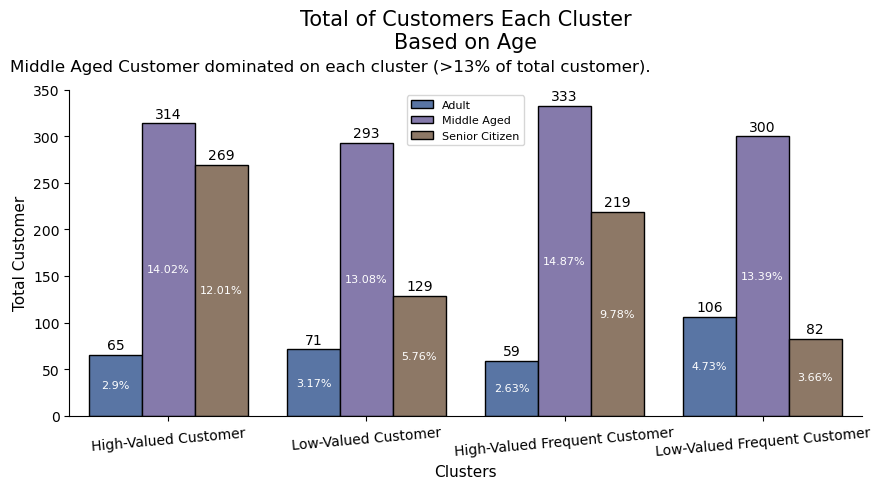

In [146]:
# Custom color palette
custom_palette = ['#4c72b0', '#8172b3', '#937860']

fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Total of Customers Each Cluster\nBased on Age", fontsize=15, color='black', weight='bold', pad=30)

sns.barplot(x='Clusters', y='total_customers', data=df_age_clus, hue='Age_Group', edgecolor='black', palette=custom_palette)

plt.text(x=-0.8, y=370, s="Middle Aged Customer dominated on each cluster (>13% of total customer).", fontsize=12, fontstyle='italic')
plt.xlabel('Clusters', fontsize=11)
plt.xticks(np.arange(4), ['High-Valued Customer', 'Low-Valued Customer', 'High-Valued Frequent Customer', 'Low-Valued Frequent Customer'], rotation=5)
plt.ylabel('Total Customer', fontsize=11)
plt.ylim(0, 350)
plt.legend(prop={'size':8}, loc='best')

# Update the bar_label text colors
plt.bar_label(ax.containers[0], padding=2,)
plt.bar_label(ax.containers[1], padding=2,)
plt.bar_label(ax.containers[2], padding=2,)
plt.bar_label(ax.containers[0], ['2.9%', '3.17%', '2.63%', '4.73%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1], ['14.02%', '13.08%', '14.87%', '13.39%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[2], ['12.01%', '5.76%', '9.78%', '3.66%'], label_type='center', color='white', weight='bold', fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()


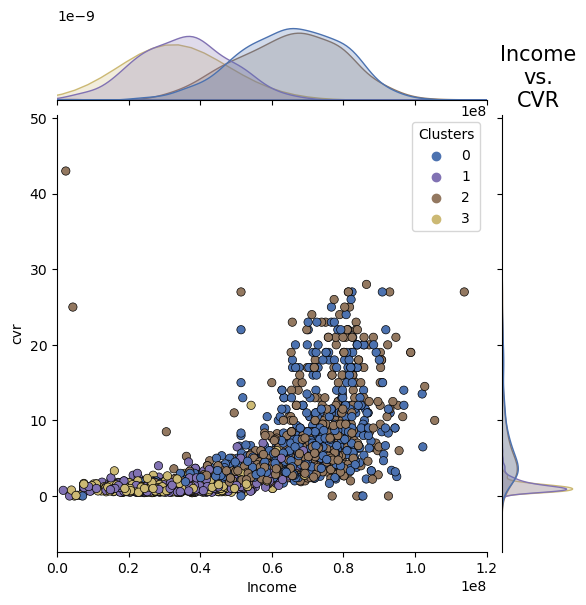

In [149]:
plot = sns.jointplot(x=df_pre['Income'], y=df_pre['cvr'], hue=df_pre['Clusters'], edgecolor='black', palette=['#4c72b0', '#8172b3', '#937860', '#ccb974'])
plt.title('Income\nvs.\nCVR', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 120000000)
plt.show()

In [150]:
display(df_pre.groupby('Clusters').describe(include='all'))

Education                                                 ...  \
             count unique top freq first last mean  std  min  25%  ...   
Clusters                                                           ...   
0              648      5  S1  332   NaN  NaN  NaN  NaN  NaN  NaN  ...   
1              493      5  S1  249   NaN  NaN  NaN  NaN  NaN  NaN  ...   
2              611      4  S1  320   NaN  NaN  NaN  NaN  NaN  NaN  ...   
3              488      5  S1  226   NaN  NaN  NaN  NaN  NaN  NaN  ...   

         Dt_Days_Customer                                                \
                     freq first last     mean     std      min      25%   
Clusters                                                                  
0                     NaN   NaN  NaN 3721.617 228.218 3163.000 3553.750   
1                     NaN   NaN  NaN 3632.172 226.801 3165.000 3453.000   
2                     NaN   NaN  NaN 3696.147 230.195 3163.000 3534.500   
3                     NaN   NaN  NaN 3625.496 229.461 3162.000 3426.500   

                                     
              50%      75%      max  
Clusters                             
0        3729.000 3899.000 4225.000  
1        3627.000 3787.000 4225.000  
2        3709.000 3865.000 4223.000  
3        3607.000 3809.250 4225.000  

[4 rows x 208 columns]

## *Interpreation Customer Summary*

Visualization results using PCA with 2 main PCs show that the customer clusters are perfectly separated. The K-Means Clustering Algorithm using the RFMLC Method produces 4 clear customer clusters in this dataset.

1. High-Valued Customer (Cluster 0):

Cluster 0 has 648 customers (28.93% of the total subscribers). They have high novelty (73 days on average) and high total purchases (21 items on average), indicating high spending on our platform (about 1 million per year). The majority of customers in this group are middle-aged customers (45-64 years) of 48.46%, most have 1 child, and have the highest average income (around IDR 65 million per year) with low web visits per month (average -average 4 times).

2. Low-Valued Customer (Cluster 1):

• 493 customers (22.01% of the total) in this group.
• Highest average novelty (74 days) and low purchases (8 items on average), meaning they spend less and less on our platform (around 92k per year).
• Domination by 59.43% middle aged customers (45-64 years) with 1 child and average income (around 36 million per year) and high monthly web visits (6 times on average).

3. High-Valued Frequent Customers (Cluster 2):

• 611 customers (27.28% of the total) in this group.
• Low average novelty (23 days) and high purchases (21 items on average), meaning they shop frequently and a lot on our platform (around 989k per year).
• Domination by 54.5% middle aged customers (45-64 years) with 1 child and average income (about 65 million per year) with low monthly web visits (4 times average).

4. Low-Valued Frequent Customers (Cluster 3):

• 488 customers (21.79% of the total) in this group.
• High average recency (24 days) and lowest purchases (average 7 items), meaning they spend often but little on our platform (around 75 thousand per year).
• Domination by 61.48% middle aged customers (45-64 years) with 1 child and average income (around 35 million per year) with high monthly web visits (6 times on average).






## *Recommendation*

Insights:

Create a membership tier program (Platinum, Gold, Silver, Bronze) with different privileges for each customer group (High Rated Customer, High Rated Frequent Customer, Low Rated Frequent Customer, Low Rated Customer).

Prioritize focusing on a group of High-Valued Customers to prevent churn. Improve service, after-sales maintenance and product quality. Provide Platinum membership with discounts, promotions and free shipping to encourage more frequent shopping.
